# Telecom Churn Case Study
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Import required libraries

In [1]:
# lets import the required libraries and packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

# Helper functions

In [3]:
def analysis(y_test, y_test_pred_):
    print('Confusion matrix:\n', confusion_matrix(y_test, y_test_pred_))
    print('----------------------------')
    print("Accuracy:", round(metrics.accuracy_score(y_test, y_test_pred_),3))
    print('----------------------------')
    print("Classification report:\n",classification_report(y_test, y_test_pred_))

# Initial look and feel of data

In [4]:
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
telecom.shape

(99999, 226)

In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# Filter High Value Customers

High-value customers : Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [8]:
# Find the columns related to recharge
rech_columns = [x for x in list(telecom.columns) if "rech" in x]
print("Columns related to recharge:")
print(rech_columns)

Columns related to recharge:
['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


## Creating column to show total recharge data amnt in all the four months
The data currently has total recharges for data and the average recharge amount. Lets create a column with total recharge amount for data by multiplying average amnt with total number of recharges for data

In [9]:
telecom['total_rech_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_rech_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']
telecom['total_rech_data_amt_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']

# Drop the original columns as well
telecom.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

## Calculating the average recharge amnt for the 6th and 7th month
The total recharge amount for a month is the total of total recharge amount + total recharge data amount.
This can be done for 6th and 7th month and the average for two months can be calculate

In [10]:
telecom_av_rech_6n7 = (telecom['total_rech_amt_6'].fillna(0) 
+ telecom['total_rech_amt_7'].fillna(0) 
+ telecom['total_rech_data_amt_6'].fillna(0) 
+ telecom['total_rech_data_amt_7'].fillna(0))/2

## Finding the 70th percentile of the average recharge amount for the 6th and 7th month

In [11]:
percentile_70_6n7 = np.percentile(telecom_av_rech_6n7, 70.0)
print("70 percentile is : ", percentile_70_6n7)

70 percentile is :  478.0


## Filtering customer above the 70th percentile of the average recharge amount

In [12]:
# Fitler the given data set based on 70th percentile
telecom_hv_cust = telecom[telecom_av_rech_6n7 >= percentile_70_6n7]
print("Dimensions of the filtered dataset:",telecom_hv_cust.shape)

Dimensions of the filtered dataset: (30001, 222)


We have filtered the high value customers as per requirements in the assignments

# Tag Churners
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [13]:
# The sum for the columns 'total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9' indicates that
# user has 0 usage of calls and data
# This we assume as the churned customer
telecom_hv_cust['churn'] = np.where(telecom_hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_hv_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014

## Find out the churn percentage

In [14]:
round(telecom_hv_cust['churn'].value_counts()/len(telecom_hv_cust)*100, 2)

0    91.86
1     8.14
Name: churn, dtype: float64

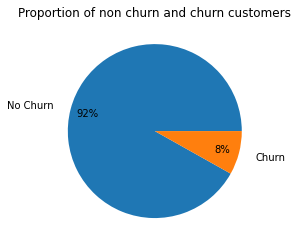

In [15]:
# Find out churn/non churn percentage
val_counts = round(telecom_hv_cust['churn'].value_counts()/len(telecom_hv_cust)*100, 2)
labels = val_counts.index.map({0: 'No Churn', 1: 'Churn'})
plt.pie(val_counts, labels=labels, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title("Proportion of non churn and churn customers")
plt.show()

### Observation : 
This is a case of class imbalance, we will treat it later using SMOTE method

# Data cleansing and treatment

## Dropping columns with only one unique values as they wont add value to the analysis and model building

In [16]:
dropped_columns = []
for column in telecom_hv_cust.columns:
    if telecom_hv_cust[column].nunique() == 1:
        dropped_columns.append(column)
        telecom_hv_cust.drop(column,axis=1,inplace = True)

print("Dropped columns:")
print(dropped_columns)
print("\n\nDimension of the updated dataset:",telecom_hv_cust.shape)

Dropped columns:
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


Dimension of the updated dataset: (30001, 207)


## Check percentage of misssing values in each columns

In [17]:
# Lets check the null values present in the dataset
round((telecom_hv_cust.isnull().sum() * 100 / len(telecom_hv_cust)), 2).sort_values(ascending = False)

total_rech_data_amt_9    49.27
count_rech_3g_9          49.27
arpu_3g_9                49.27
arpu_2g_9                49.27
night_pck_user_9         49.27
                         ...  
last_day_rch_amt_7        0.00
last_day_rch_amt_8        0.00
last_day_rch_amt_9        0.00
vol_2g_mb_6               0.00
mobile_number             0.00
Length: 207, dtype: float64

## Dropping columns with more than 30% of missing values except the ones for 9th month

### Find columns with more than 30% missing values and not belonging to the 9th month

In [18]:
# Drop Columns with > 30% of missing values except 9th Month's columns
cols = telecom_hv_cust.columns
telecom_null_perc = telecom_hv_cust.isnull().sum() * 100 / len(telecom_hv_cust)
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_perc})

not9th_and_greaterthan30 = (telecom_null_df["col_name"].str.contains('_9')==False) & (telecom_null_df["perc_null"] > 30.0)
drop_cols = telecom_null_df.loc[not9th_and_greaterthan30]["col_name"]
print("List of columns with more than 30% missing values:")
print(list(drop_cols))

List of columns with more than 30% missing values:
['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8']


### Drop the columns

In [19]:
# Lets drop these columns with more than 30% of missing values
telecom_hv_cust.drop(drop_cols, axis=1,inplace = True)
telecom_hv_cust.shape

(30001, 180)

## Convert non-numerical columns to numerical columns

### Find non-numerical columns

In [20]:
object_col_data = telecom_hv_cust.select_dtypes(include=['object'])
print(list(object_col_data.columns))

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_9']


In [21]:
object_col_data.head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,NaN
7,6/27/2014,7/25/2014,8/26/2014,9/30/2014,NaN
8,6/25/2014,7/31/2014,8/30/2014,9/30/2014,NaN
21,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN
23,6/18/2014,7/7/2014,8/24/2014,9/28/2014,9/9/2014


#### Observation : all the columns above can be converted to date type

### Convert the columns found above to date time

In [22]:
for col in object_col_data.columns:
    telecom_hv_cust[col] = pd.to_datetime(telecom_hv_cust[col])

telecom_hv_cust.shape

(30001, 180)

## Find and drop highly correlated columns

In [23]:
# Lets check the correlation amongst the features, drop the highly correlated ones
cor = telecom_hv_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor


,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_9,churn
mobile_number,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

### We will drop the columns with high correlation (+/- 60%)

In [24]:
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
telecom_hv_cust.drop(drop_col_list, axis=1, inplace=True)
telecom_hv_cust.shape

(30001, 125)

## Drop columns for the last month as it has already been used to get churn column

### Find columns for the 9th month

In [25]:
cols_to_drop = [col for col in telecom_hv_cust.columns if '_9' in col]
print(cols_to_drop)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']


### Drop the columns found above

In [26]:
telecom_hv_cust.drop(cols_to_drop, axis=1, inplace=True)
telecom_hv_cust.shape

(30001, 88)

## Check the dataset again for null values

In [27]:
round((telecom_hv_cust.isnull().sum() * 100 / len(telecom_hv_cust)), 2).sort_values(ascending = False)

std_og_mou_8        3.91
std_ic_t2f_mou_8    3.91
ic_others_8         3.91
loc_og_mou_8        3.91
isd_ic_mou_8        3.91
                    ... 
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_num_8    0.00
total_rech_num_7    0.00
mobile_number       0.00
Length: 88, dtype: float64

#### Obervation : we are left with few columns with around 4% of null values

### Drop rows with null values

In [28]:
telecom_hv_cust = telecom_hv_cust.loc[telecom_hv_cust.isnull().sum(axis=1) == 0, :]

In [29]:
# lets check the dataset again
round((telecom_hv_cust.isnull().sum() * 100 / len(telecom_hv_cust)), 2).sort_values(ascending = False)

churn               0.0
sep_vbc_3g          0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_8    0.0
std_og_mou_6        0.0
                   ... 
total_rech_num_8    0.0
max_rech_amt_6      0.0
max_rech_amt_7      0.0
max_rech_amt_8      0.0
mobile_number       0.0
Length: 88, dtype: float64

# Plot methods

In [30]:
# Lets write a function to plot historgram for some sample columns
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # For displaying purposes, pick columns that have between 1 and 50 unique values
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [31]:
# Function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    sns.heatmap(corr)
    plt.show()

In [32]:
# Function to plot scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    sns.pairplot(df[columnNames])
    plt.show()

## Check distribution of 10 columns

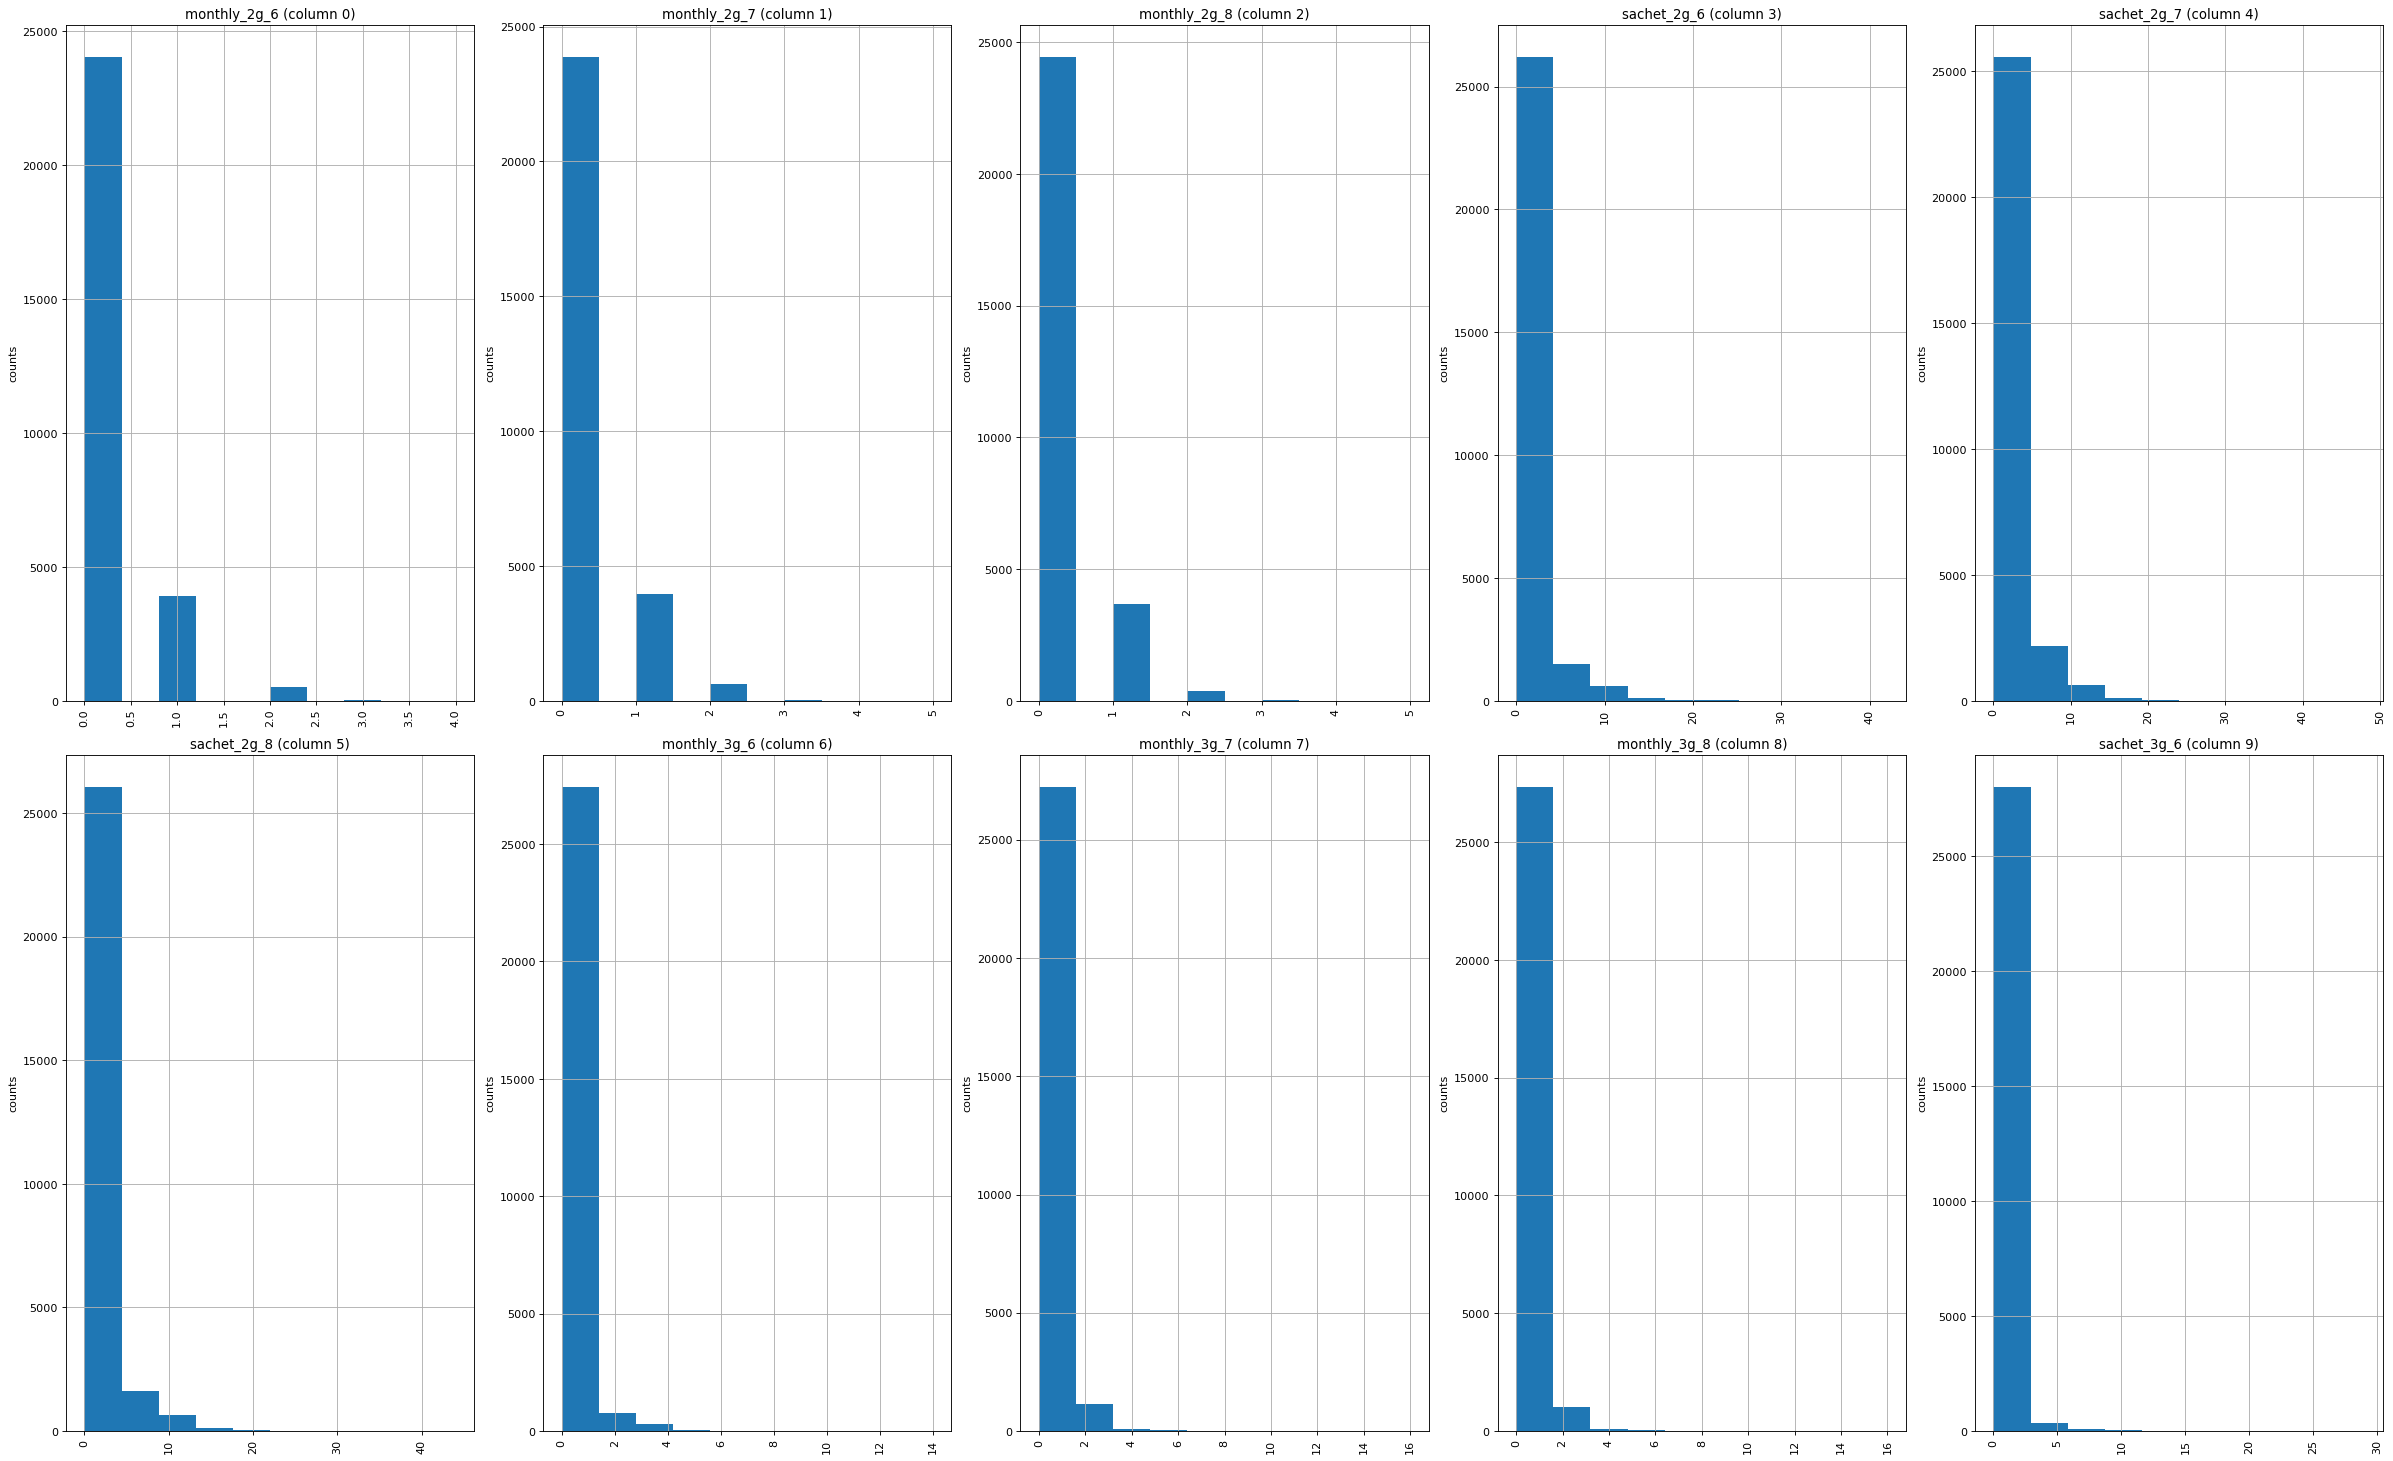

In [33]:
plotPerColumnDistribution(telecom_hv_cust, 10, 5)

## Check correlation of columns

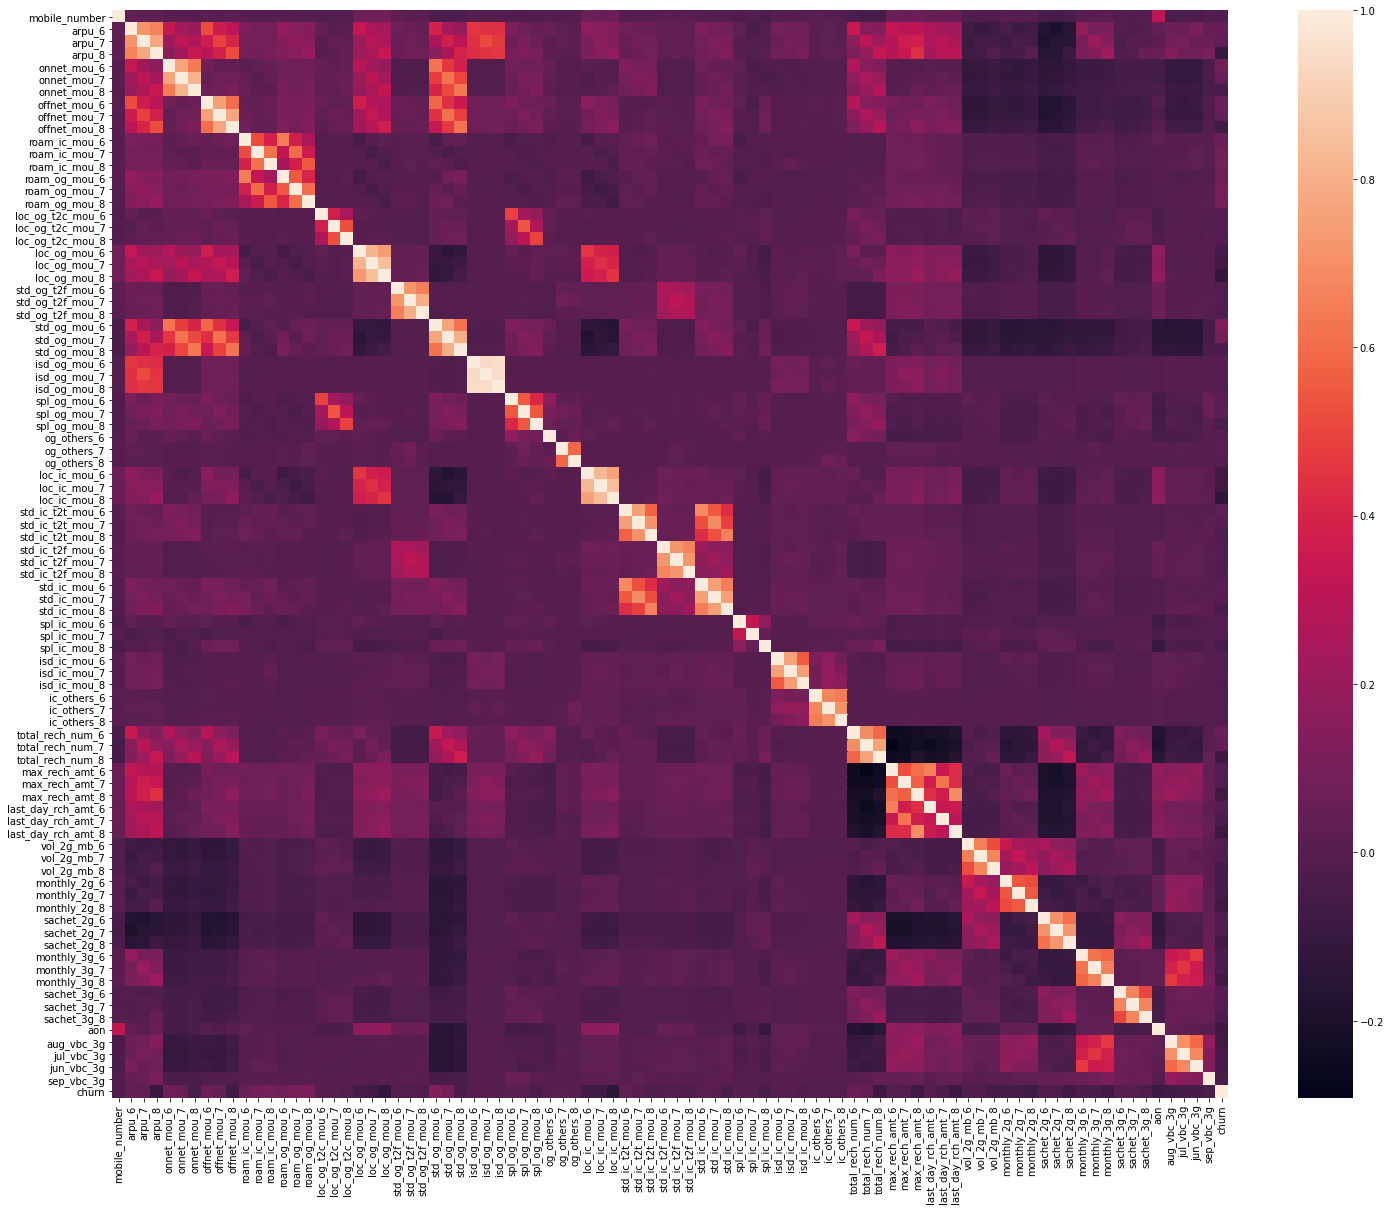

In [34]:
plt.figure(figsize=[25,20])
plotCorrelationMatrix(telecom_hv_cust, 53)

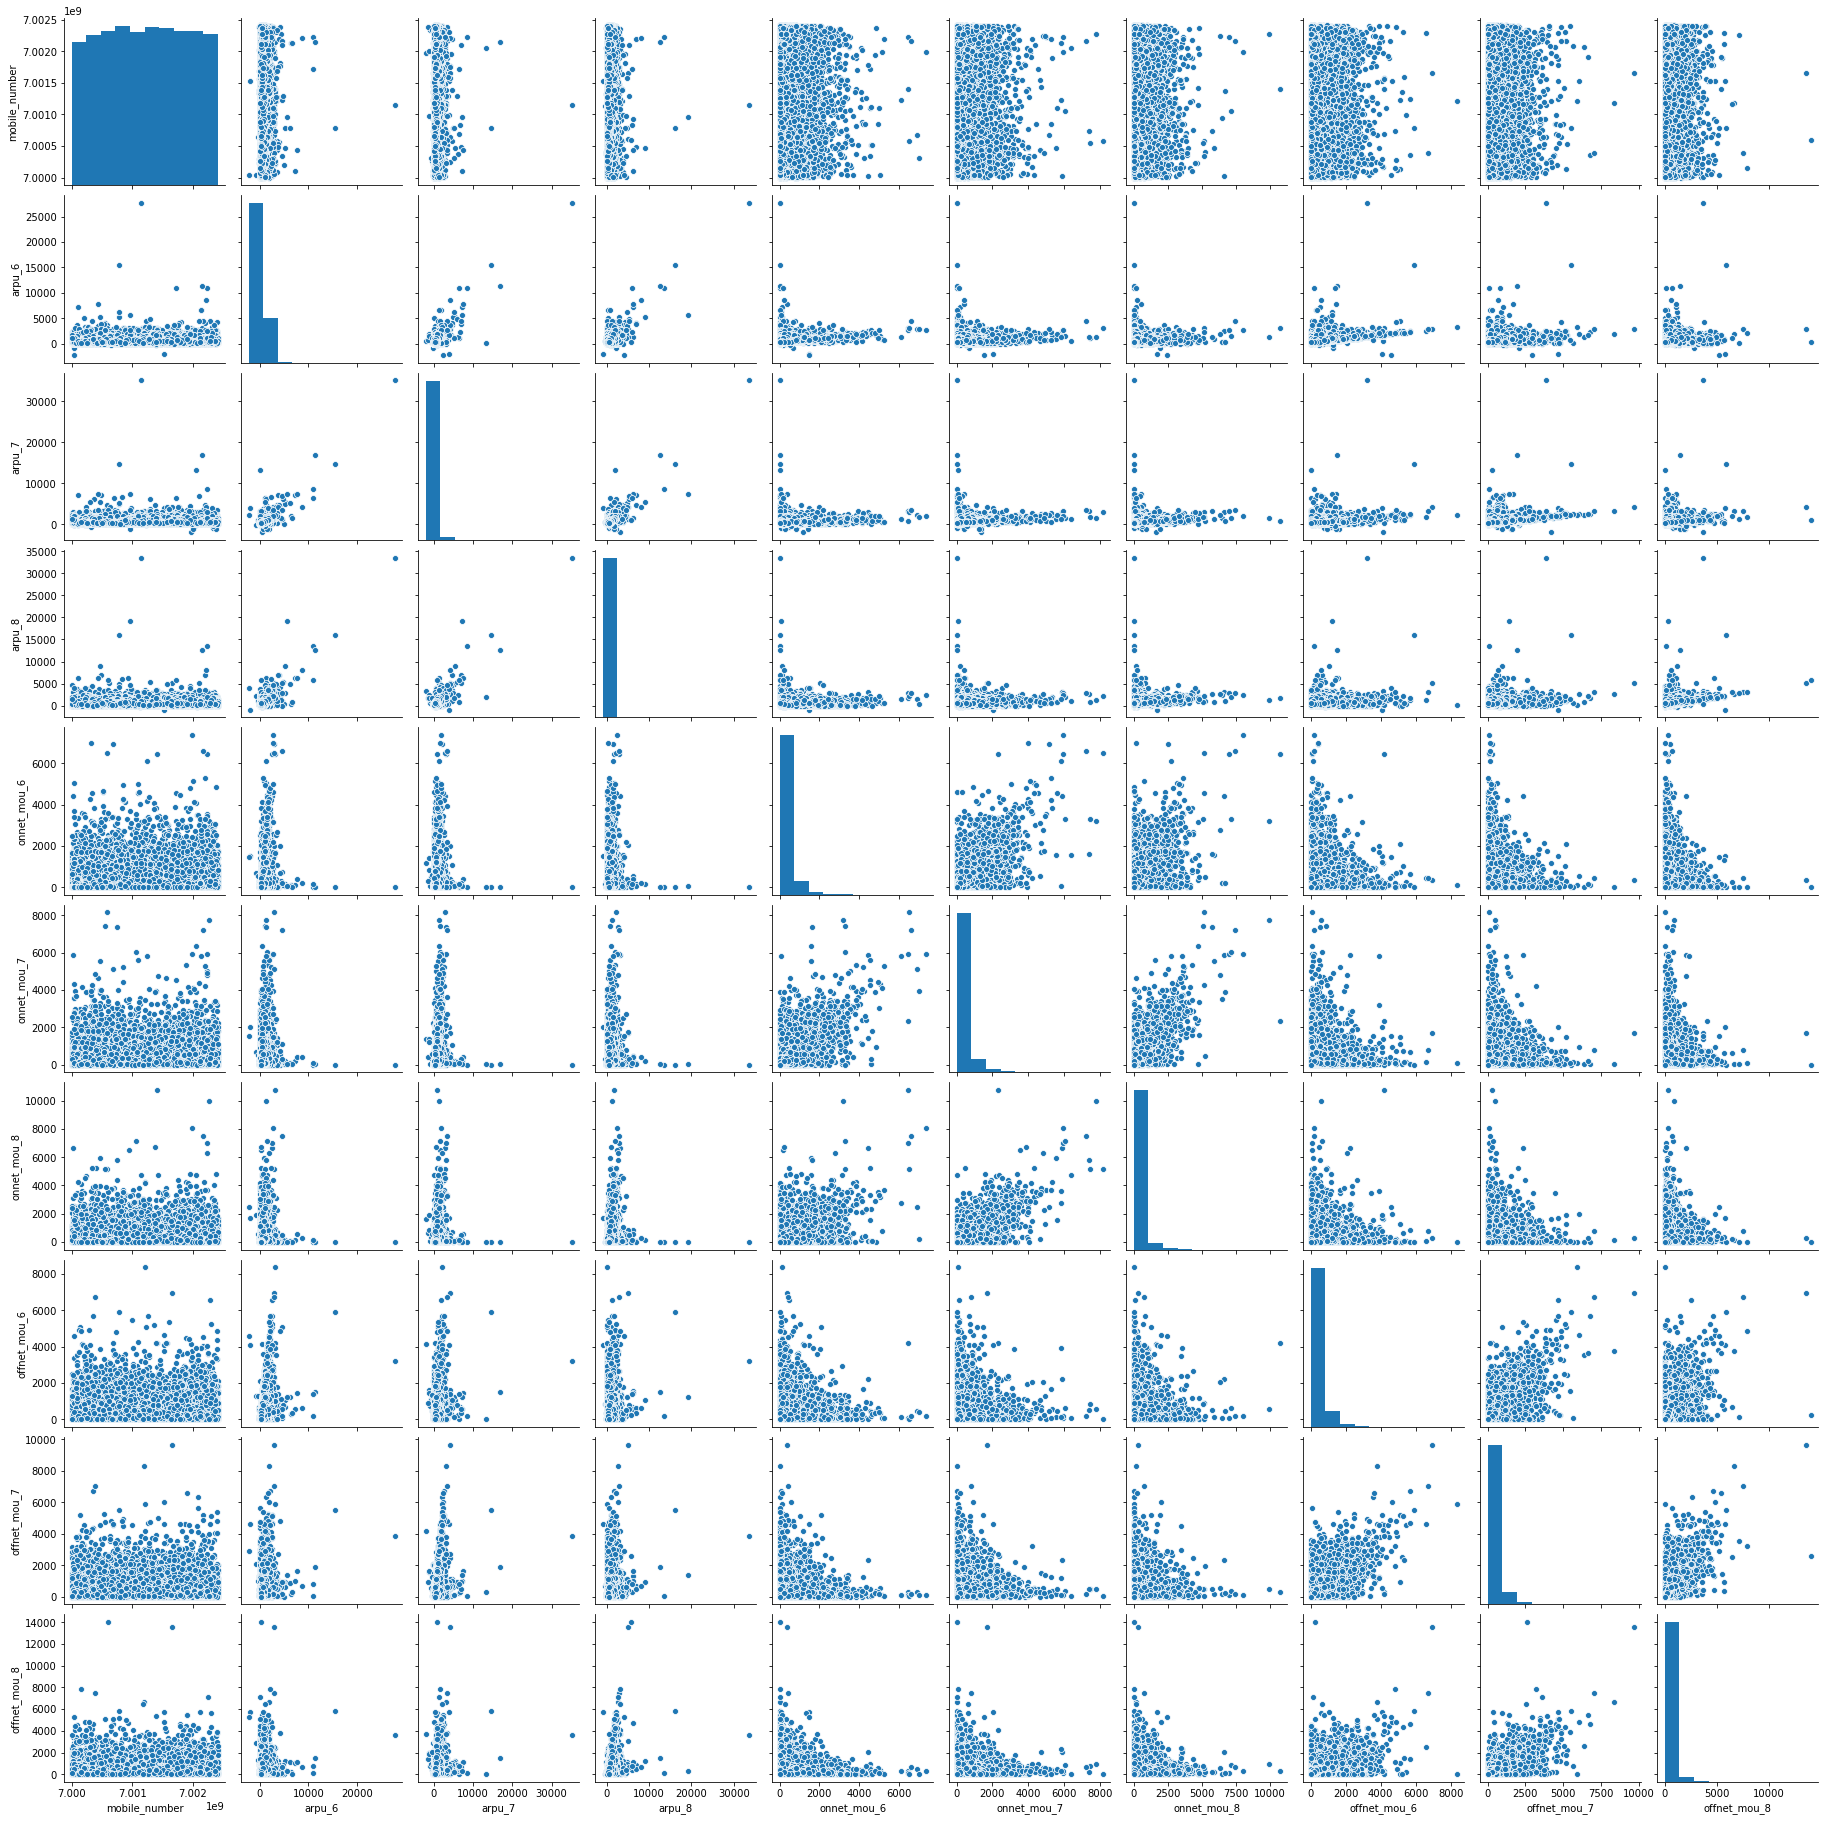

In [35]:
plotScatterMatrix(telecom_hv_cust, 20, 10)

# Derive New Features from Existing columns

## Averaging columns for 6th & 7th month and dropping the original columns

### Find columns for the 6th and 7th month

In [36]:
col_list = telecom_hv_cust.filter(regex='_6|_7').columns.str[:-2]
col_list = col_list.unique()
col_list

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2f_mou', 'std_og_mou',
       'isd_og_mou', 'spl_og_mou', 'og_others', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2f_mou', 'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'max_rech_amt', 'last_day_rch_amt', 'vol_2g_mb',
       'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g'],
      dtype='object')

### Prepare average columns for each of the columns for 6th and 7th month and drop the original columns

In [37]:
# Create multiple new columns, which would be average  of 6th & 7th months
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_hv_cust[avg_col_name] = (telecom_hv_cust[col_6]  + telecom_hv_cust[col_7])/ 2

In [38]:
# We dont need columns from which we have derived new features, we will drop those columns
print ("dimension of the updated dataset after creating derived features:",telecom_hv_cust.shape)
col_to_drop = telecom_hv_cust.filter(regex='_6|_7').columns
telecom_hv_cust.drop(col_to_drop, axis=1, inplace=True)

print("dimension of the dataset after dropping unnecessary columns:",telecom_hv_cust.shape)

dimension of the updated dataset after creating derived features: (28504, 115)
dimension of the dataset after dropping unnecessary columns: (28504, 61)


## Deriving age on network in months from days

### Lets now conevrt AON in months as it is currently in days and drop the days colums.


In [39]:
telecom_hv_cust['aon_mon'] = telecom_hv_cust['aon']/30
telecom_hv_cust.drop('aon', axis=1, inplace=True)
telecom_hv_cust['aon_mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_mon, dtype: float64

## Plot for the updated datasets to get quick insight

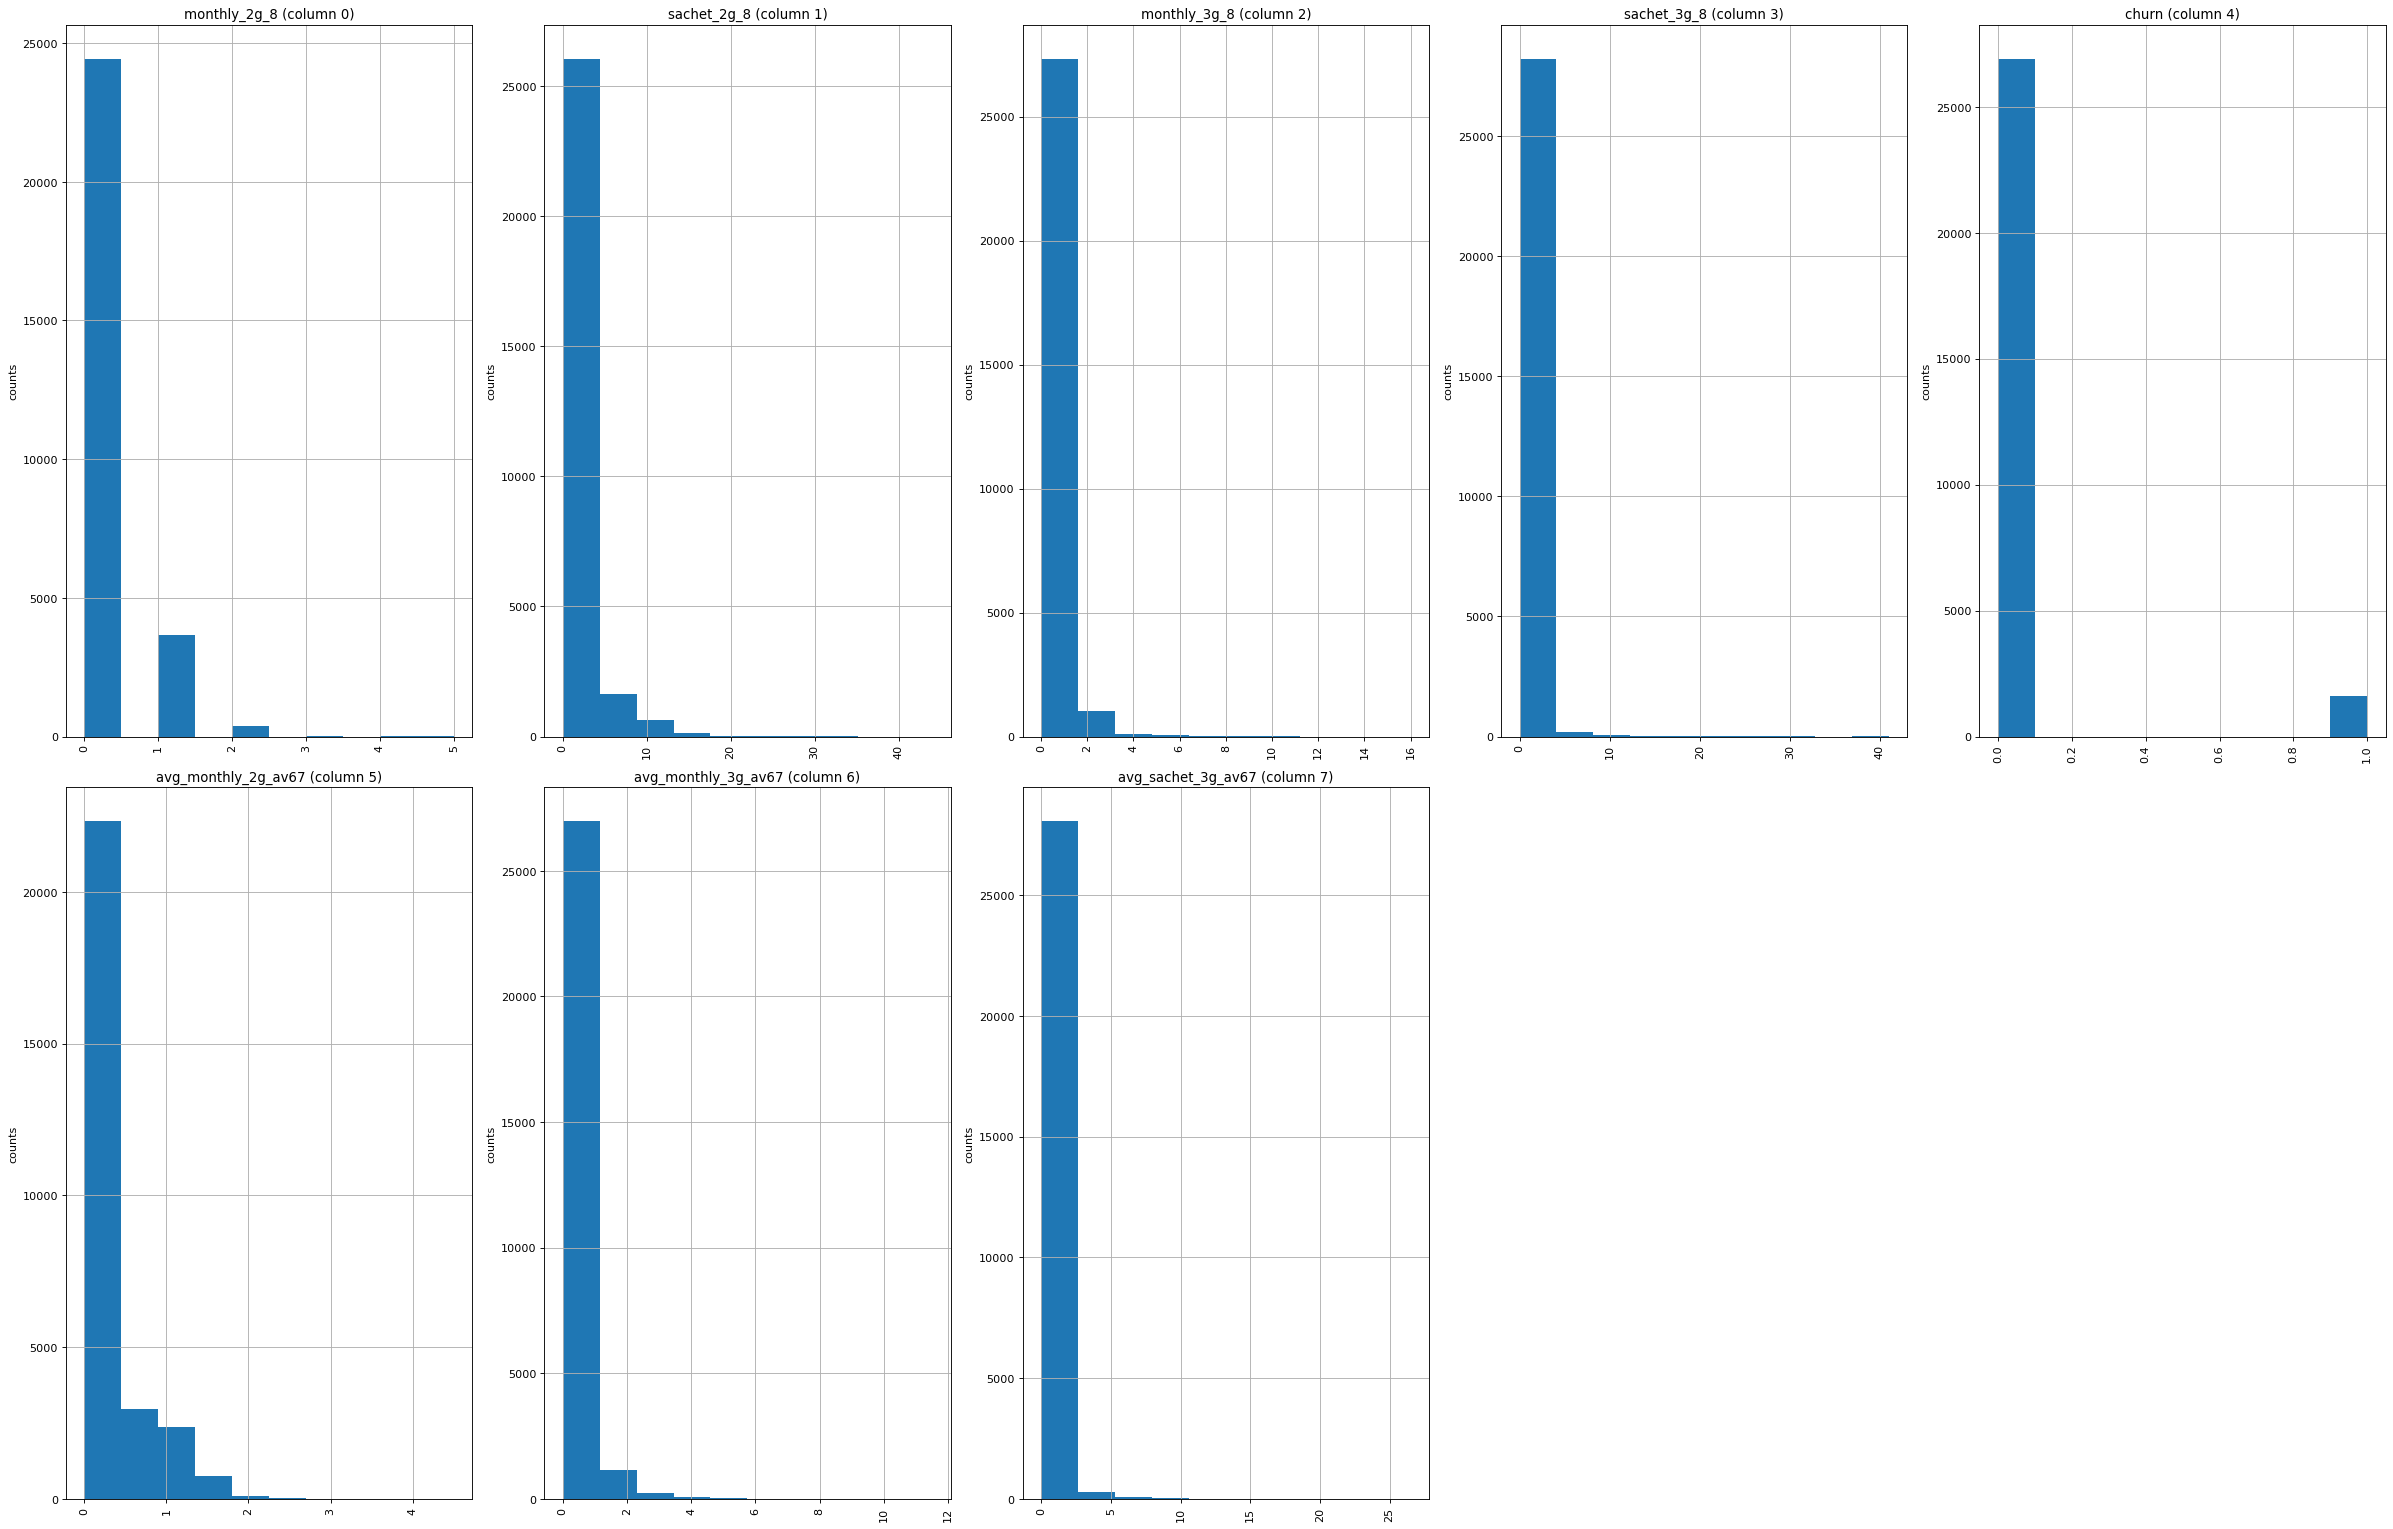

In [40]:
# lets again draw the plots with the updated dataset
plotPerColumnDistribution(telecom_hv_cust, 10, 5)

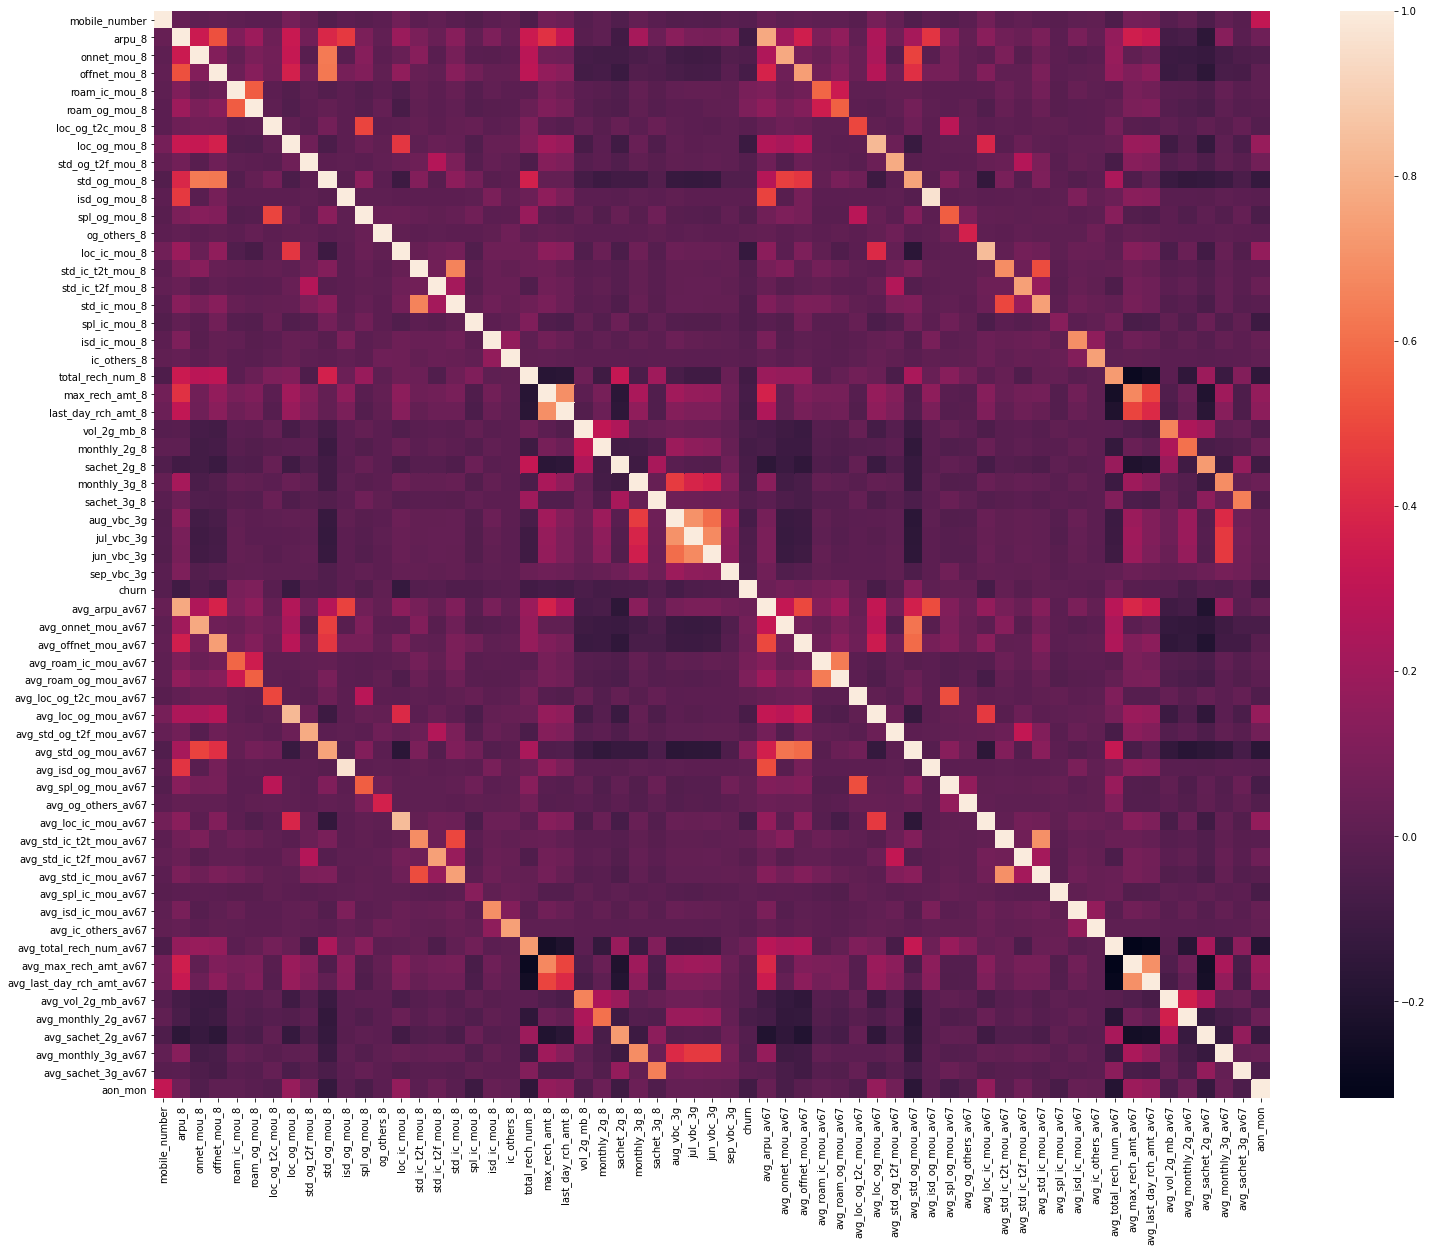

In [41]:
plt.figure(figsize=[25,20])
plotCorrelationMatrix(telecom_hv_cust, 53)

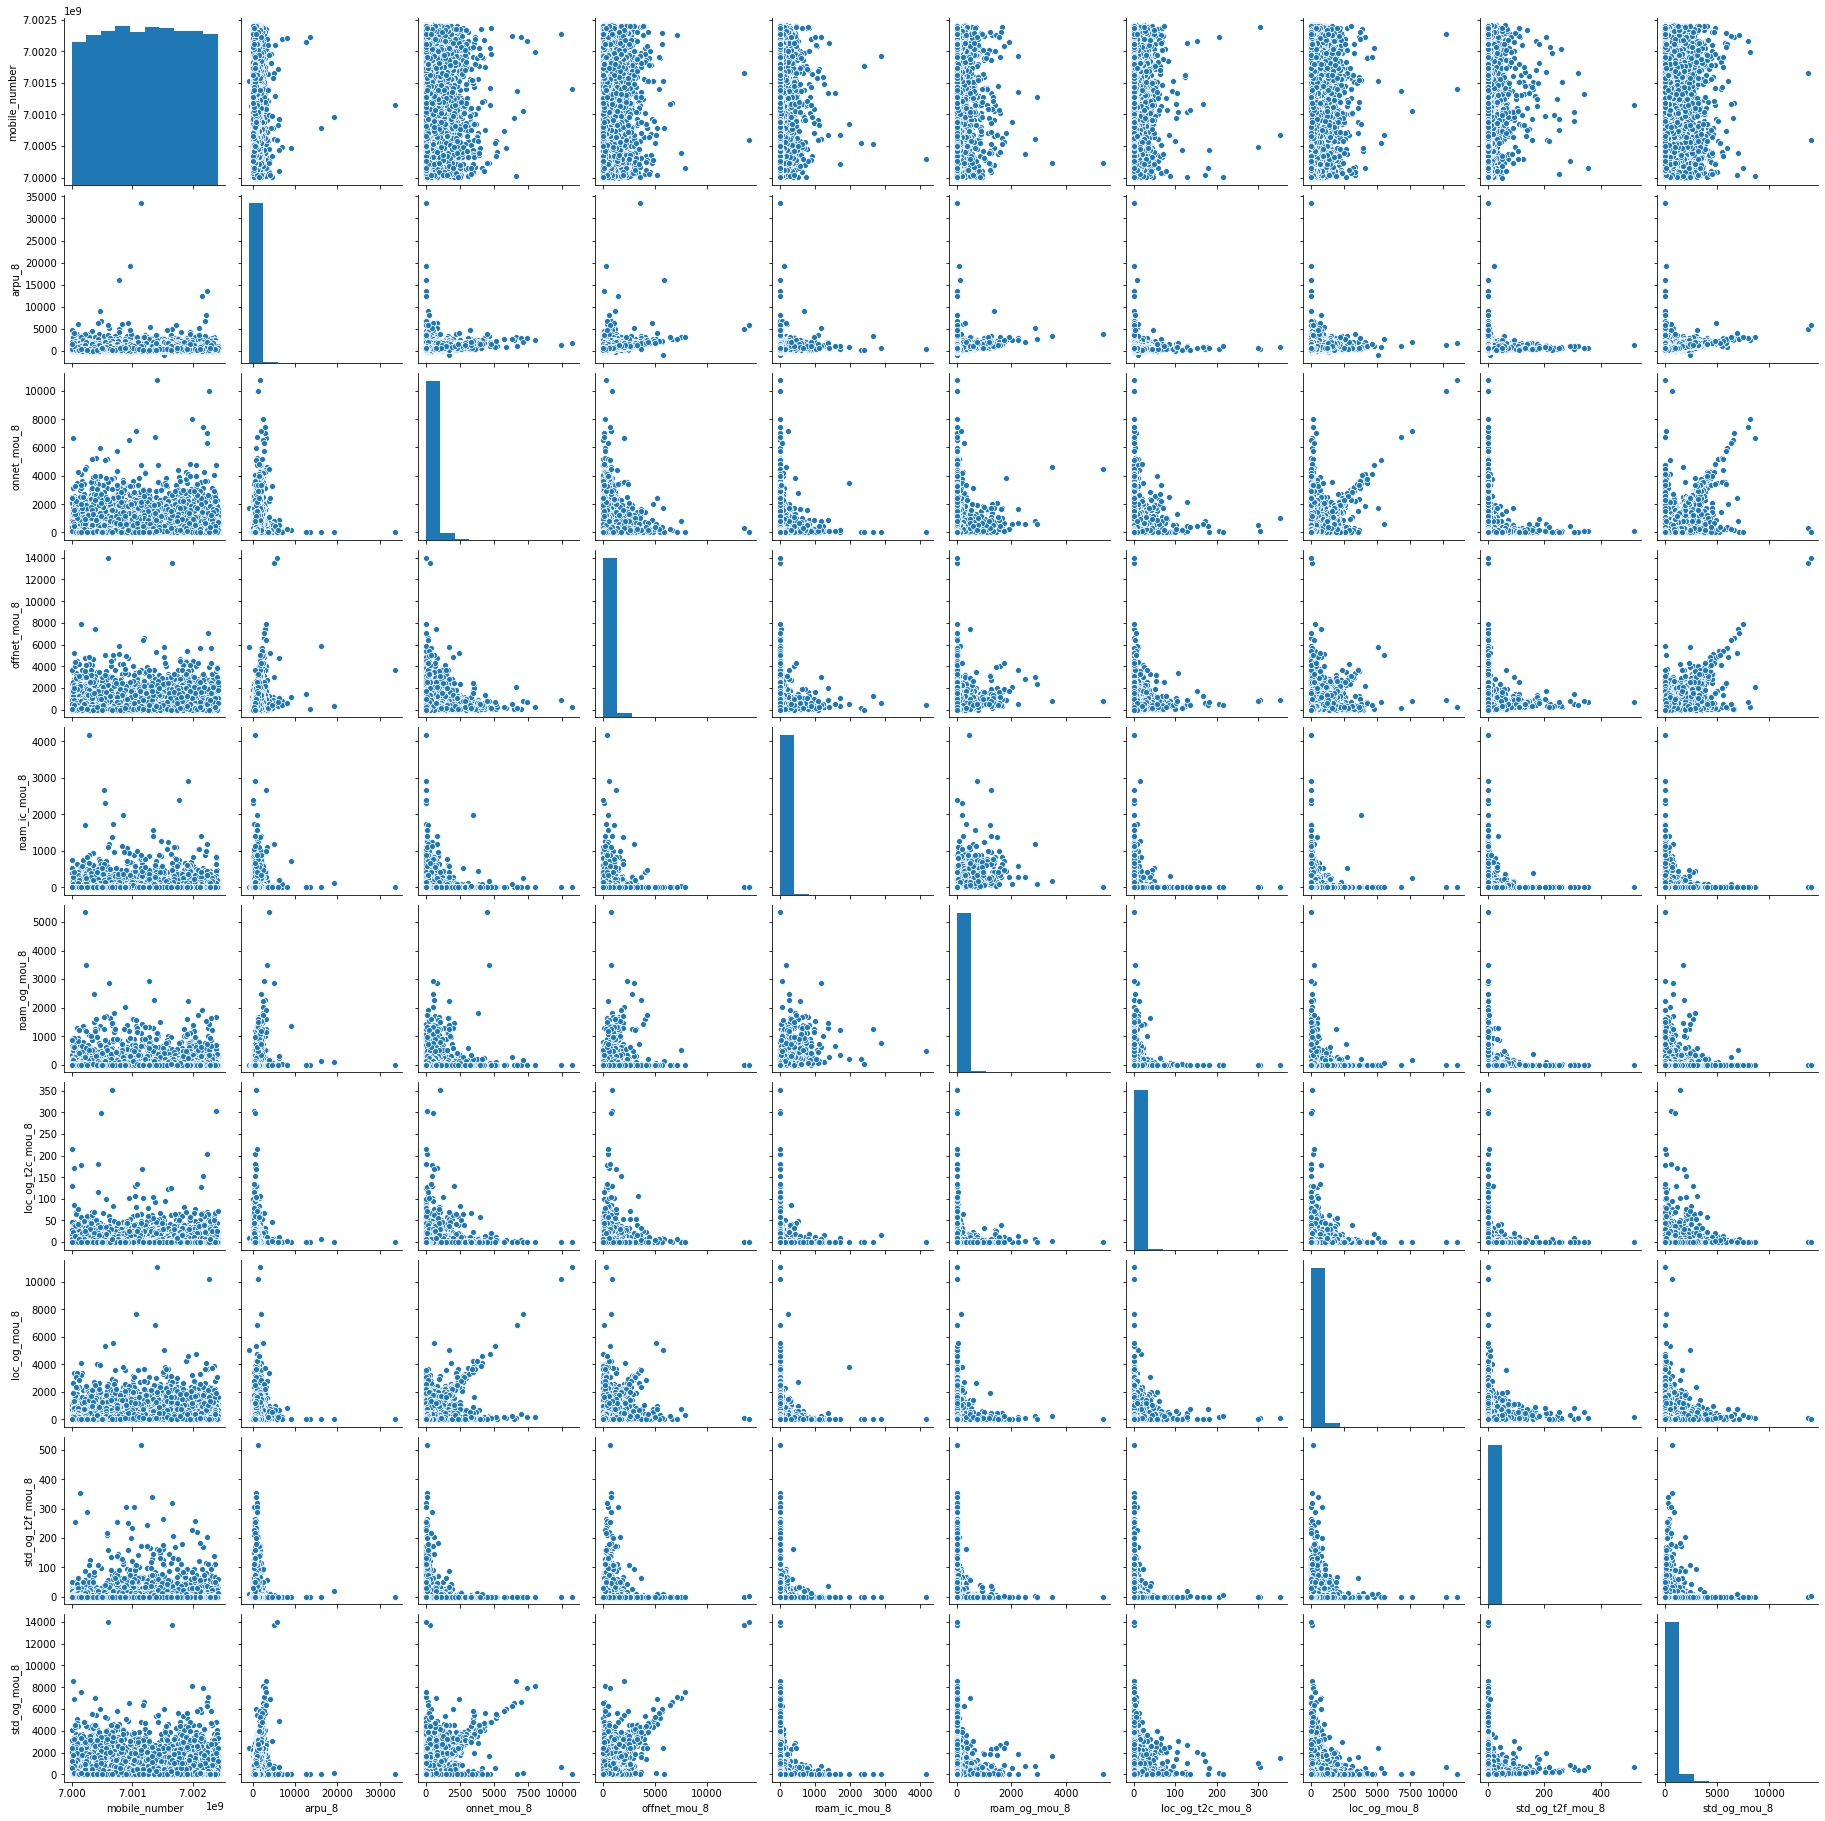

In [42]:
plotScatterMatrix(telecom_hv_cust, 20, 10)

## Plotting the distribution of AON in months

Text(0.5, 1.0, 'Tenure Graph')

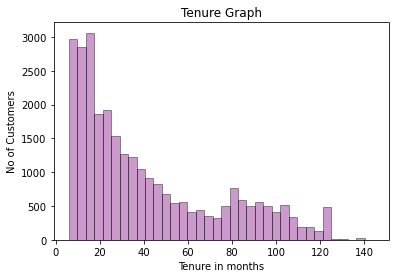

In [43]:
ax = sns.distplot(telecom_hv_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')
# below graph simply shows the tenure of the customers

## Converting AON in buckets of ranges

In [44]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_hv_cust['tenure_range'] = pd.cut(telecom_hv_cust['aon_mon'], tn_range, labels=tn_label)
telecom_hv_cust['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

## Plotting correlation of churn with independent columns

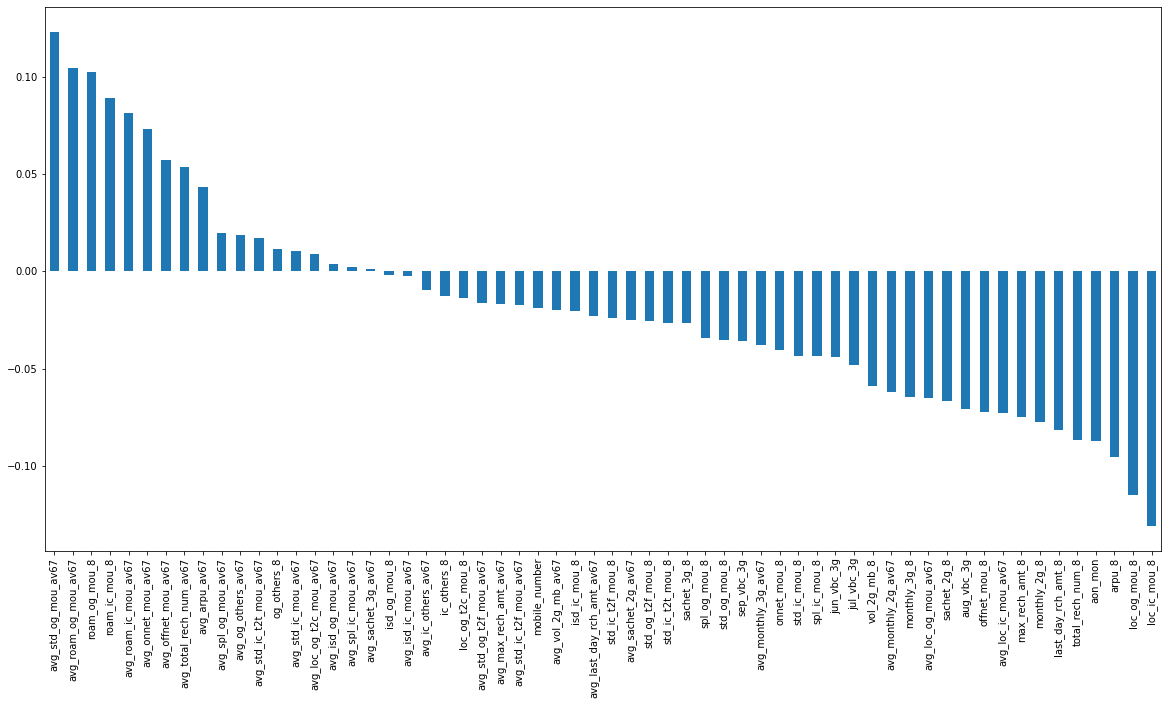

In [45]:
plt.figure(figsize=(20,10))
telecom_hv_cust.corr()['churn'].drop("churn").sort_values(ascending=False).plot(kind='bar')
plt.show()

### Observations : 
- Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. 
- Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

## Scatter plot for total recharge number and arpu for the 8th month

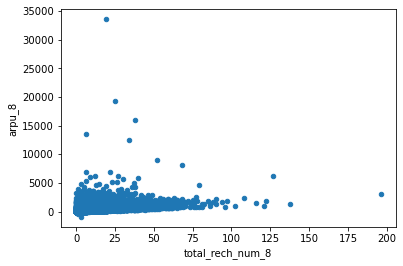

In [46]:
# Lets now draw a scatter plot between total recharge and avg revenue for the 8th month
telecom_hv_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

## Scatter plot for tenure and average arpu for the 6th and 7th month

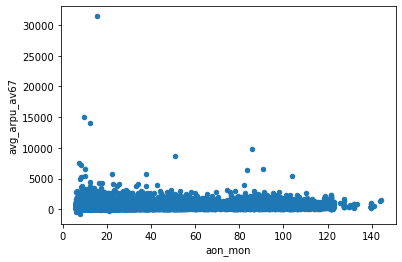

In [47]:
# plot between tenure and revenue
telecom_hv_cust[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon', y='avg_arpu_av67')
plt.show()

# Churn vs. Other Important Features

## Boxplot for AON for non-churn and churn customers

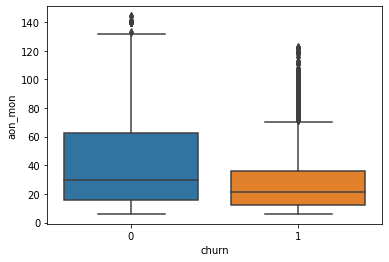

In [48]:
sns.boxplot(x = telecom_hv_cust.churn, y = telecom_hv_cust.aon_mon)
plt.show()

### From the plot above, its clear tenured customers mostly do not churn and they keep availing telecom services. Although some with smaller tenure might churn.

## Distribution of max recharge amount for 6th and 7th month for non-churned and churned customers

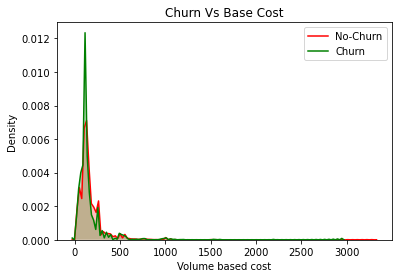

In [49]:
ax = sns.kdeplot(telecom_hv_cust.avg_max_rech_amt_av67[(telecom_hv_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_hv_cust.avg_max_rech_amt_av67[(telecom_hv_cust["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')
plt.show()

## Distribtion of max recharge amount for the 8th month for non-churned and churned customers

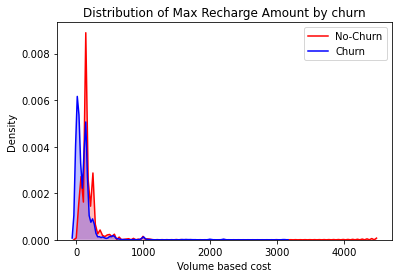

In [50]:
ax = sns.kdeplot(telecom_hv_cust.max_rech_amt_8[(telecom_hv_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_hv_cust.max_rech_amt_8[(telecom_hv_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

#### As can be seen from the above plot the max recharge amount in 8th month of the churn customers is less compared to the non-churn customers

# Creating copy of dataframe for modelling

In [51]:
# We will create a new dataset for model building
df = telecom_hv_cust[:].copy()

#### Can reuse telecom_hv_cust by assigning back to df in the code below

# Prepare dataframe for modelling

## Dropping highly correlated columns

In [52]:
# Lets drop tenure range because it is highly correlated with AON MONTH column
df.drop('tenure_range', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,19.38,18.74,0.0,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,910.65,122.16,0.0,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0.00,0.00,0.0,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,51.86,0.00,0.0,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,20.133333
33,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,358.10,2706.83,1714.67,0.0,0,1669.9265,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.0,2.180,1.455,0.595,4.420,0.000,0.000,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,44.266667


## Get X and y

In [53]:
X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)

## Train test split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (19952, 59)
Dimension of X_test: (8552, 59)


## Dealing with class imbalance using SMOTE

In [55]:
# As discussed earlier, given dataset is skewed, lets balance the dataset
!pip install imblearn
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [56]:
print("Dimension of X_tr Shape:", X_tr.shape)
print("Dimension of y_tr Shape:", y_tr.shape)

Dimension of X_tr Shape: (37666, 59)
Dimension of y_tr Shape: (37666,)


## Scaling the dataset

In [57]:
# Apply standard scaling
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)

In [58]:
X_tr = pd.DataFrame(X_tr, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

### Plot pie chart to check imbalance resolve

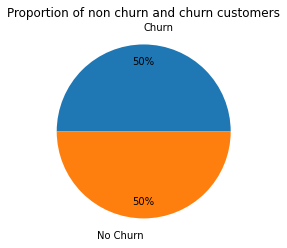

In [59]:
val_counts = round(y_tr.value_counts()/len(y_tr)*100, 2)
labels = val_counts.index.map({0: 'No Churn', 1: 'Churn'})
plt.pie(val_counts, labels=labels, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title("Proportion of non churn and churn customers")
plt.show()

# Model building

## 1. SVM

### Fit the model

In [60]:
lr_svm = LogisticRegression(random_state=1)
lr_svm.svm = SVC(kernel='linear', random_state=1) 
lr_svm.svm.fit(X_tr,y_tr)

SVC(kernel='linear', random_state=1)

### Prediction and analysis on test data

In [61]:
y_test_pred_svm = lr_svm.svm.predict(X_test)
analysis(y_test, y_test_pred_svm)

Confusion matrix:
 [[6473 1602]
 [  95  382]]
----------------------------
Accuracy: 0.802
----------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.88      8075
           1       0.19      0.80      0.31       477

    accuracy                           0.80      8552
   macro avg       0.59      0.80      0.60      8552
weighted avg       0.94      0.80      0.85      8552



#### Plot roc curve

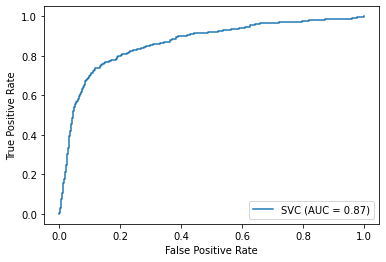

In [62]:
plot_roc_curve(lr_svm.svm, X_test, y_test)
plt.show()

## 2. Logistic Regression

### Using RFE for feature elimination

#### Fit RFE

In [63]:
lr = LogisticRegression(random_state=100)
# Let RFE select 15 most imp features for us
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_tr, y_tr)

#### Get features picked by rfe

In [64]:
rfe_features = list(X_tr.columns[rfe.support_])
print("15 most important features selected by RFE:\n", rfe_features)

15 most important features selected by RFE:
 ['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67', 'avg_loc_ic_mou_av67', 'avg_sachet_2g_av67', 'avg_monthly_3g_av67']


In [65]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [66]:
print(X_tr.shape)
print(X_rfe.shape)

(37666, 59)
(37666, 15)


#### Fit LogisticRegression model

In [67]:
# lets create a Logisctic Regression model on the seleted columns by RFE
lr = LogisticRegression(random_state=100)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=100)

#### Prediction and analysis on test data

In [68]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_test_pred_rfe = lr.predict(X_test_rfe)

analysis(y_test, y_test_pred_rfe)

Confusion matrix:
 [[6260 1815]
 [  87  390]]
----------------------------
Accuracy: 0.778
----------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      8075
           1       0.18      0.82      0.29       477

    accuracy                           0.78      8552
   macro avg       0.58      0.80      0.58      8552
weighted avg       0.94      0.78      0.84      8552



#### Plot roc curve

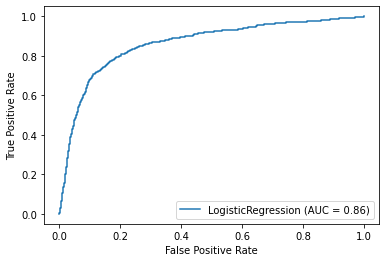

In [69]:
plot_roc_curve(lr, X_test_rfe, y_test)
plt.show()

## 3. PCA

### Fit PCA

In [70]:
pca = PCA(random_state=100)
pca.fit(X_tr)

PCA(random_state=100)

### Transform train and test to Principal Components

In [71]:
X_tr_pca = pca.transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(37666, 59)
(8552, 59)


### Try LogisticRegression on PComponents

#### Fit LogisticRegression

In [72]:
lr_pca = LogisticRegression(C=1e9, random_state=100)
lr_pca.fit(X_tr_pca, y_tr)

LogisticRegression(C=1000000000.0, random_state=100)

#### Predictions and analysis

In [73]:
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
analysis(y_test, y_test_pred_lr_pca)

Confusion matrix:
 [[6481 1594]
 [  93  384]]
----------------------------
Accuracy: 0.803
----------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.88      8075
           1       0.19      0.81      0.31       477

    accuracy                           0.80      8552
   macro avg       0.59      0.80      0.60      8552
weighted avg       0.94      0.80      0.85      8552



#### Plot roc  curve

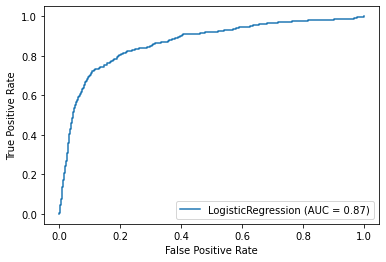

In [74]:
plot_roc_curve(lr_pca, X_test_pca, y_test)
plt.show()

### Scree plot

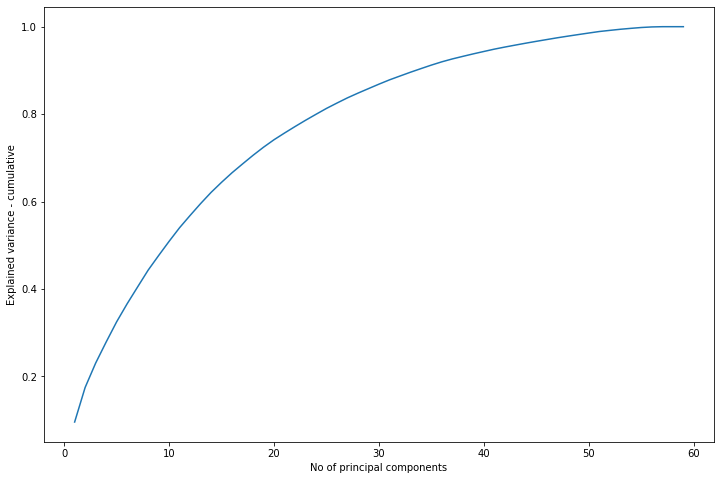

In [75]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(range(1, len(pca.components_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of principal components')
plt.ylabel('Explained variance - cumulative')
plt.show()

In [76]:
cumilative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cumilative_variance = pd.DataFrame(index=range(1,len(cumilative_variance) + 1), columns=['Cumilative_variance'],data=cumilative_variance)
cumilative_variance[cumilative_variance['Cumilative_variance'] <= 90]

,Cumilative_variance
1,9.57
2,17.47
3,23.03
4,27.85
5,32.48
6,36.60
7,40.46
8,44.29
9,47.63
10,50.89


#### 33 columns explain 90% of the variance, lets apply PCA with 33 components

### Generate 33 Principal components

In [77]:
pca_33 = PCA(n_components=33, random_state=100)

df_tr_pca_33 = pca_33.fit_transform(X_tr)
print(df_tr_pca_33.shape)

df_test_pca_33 = pca_33.transform(X_test)
print(df_test_pca_33.shape)

(37666, 33)
(8552, 33)


### Logistic regression with 33 principal components

#### Fit LogisticRegression on 33 pcs

In [78]:
lr_pca33 = LogisticRegression(C=1e9, random_state=100)
lr_pca33.fit(df_tr_pca_33, y_tr)

LogisticRegression(C=1000000000.0, random_state=100)

#### Prediction and analysis on LogisticRegression model built on 33 pcs

In [79]:
# Predicted probabilities
y_test_pred33 = lr_pca33.predict(df_test_pca_33)
analysis(y_test, y_test_pred33)

Confusion matrix:
 [[6438 1637]
 [ 104  373]]
----------------------------
Accuracy: 0.796
----------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      8075
           1       0.19      0.78      0.30       477

    accuracy                           0.80      8552
   macro avg       0.58      0.79      0.59      8552
weighted avg       0.94      0.80      0.85      8552



#### PCA with Logistic regression gives a good (fairly high) Recall score that means it is trying to minimize FALSE negatives and if that is what matters to business for a campaign, then this model can be considered. PCA with LR has given more Recall score than any other model tried for the solution.

#### Plot roc curve

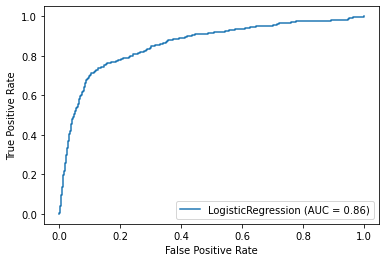

In [80]:
plot_roc_curve(lr_pca33, df_test_pca_33, y_test)
plt.show()

## 4. Decision Trees

### Select features using lasso

In [81]:
# feature selection using lasso
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso_tr = svc_model.transform(X_tr)
X_lasso_test = svc_model.transform(X_test)
position = svc_model.get_support(indices=True)

print(X_lasso_tr.shape)
print(position)

(37666, 32)
[ 2  4  6  7  8 12 13 15 16 19 21 22 23 24 25 26 30 31 32 33 34 35 39 43
 46 50 51 54 55 56 57 58]


In [82]:
lasso_features = list(X_tr.columns[position])
print("Lasso Features: \n", lasso_features)

Lasso Features: 
 ['offnet_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'sep_vbc_3g', 'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_mou_av67', 'avg_total_rech_num_av67', 'avg_max_rech_amt_av67', 'avg_monthly_2g_av67', 'avg_sachet_2g_av67', 'avg_monthly_3g_av67', 'avg_sachet_3g_av67', 'aon_mon']


### Fit DecisionTree

In [83]:
dt1 = DecisionTreeClassifier(max_depth=5, random_state=100)
dt1.fit(X_lasso_tr, y_tr)

DecisionTreeClassifier(max_depth=5, random_state=100)

### Analysis of test scores

In [84]:
y_test_pred_dt1 = dt1.predict(X_lasso_test)
analysis(y_test, y_test_pred_dt1)

Confusion matrix:
 [[7150  925]
 [ 160  317]]
----------------------------
Accuracy: 0.873
----------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      8075
           1       0.26      0.66      0.37       477

    accuracy                           0.87      8552
   macro avg       0.62      0.78      0.65      8552
weighted avg       0.94      0.87      0.90      8552



#### The recall score on the minority class is ok, but the precision and F1-score on the minority class (i.e. 1 corresponding to churn) is very less. Need to improve it with hyperparameter tuning in the successive steps

#### Plot ROC curve

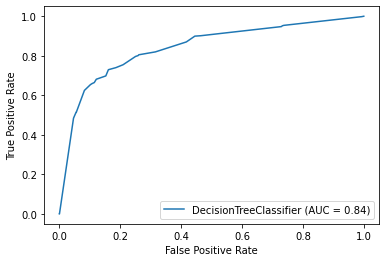

In [85]:
plot_roc_curve(dt1, X_lasso_test, y_test)
plt.show()

### Hyperparameter Tuning

#### 1. max_depth

In [86]:
# Lets do a 5 folds cross validation
n_folds = 5

# Tune on max_depth rangin from 1 to 15
parameters = {'max_depth': range(1, 15)}

# Create a DecisionTreeClassifier 
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                    scoring="roc_auc",
                    n_jobs=-1,
                    return_train_score=True)
tree.fit(X_lasso_tr, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 15)},
             return_train_score=True, scoring='roc_auc')

In [87]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.140595,0.000003,0.003124,0.006248,1,{'max_depth': 1},0.775153,0.805917,0.803392,0.803536,0.806987,0.798997,0.012002,14,0.804958,0.797267,0.797897,0.797861,0.796999,0.798996,0.003001
1,0.298042,0.049219,0.003124,0.006248,2,{'max_depth': 2},0.843821,0.866159,0.867036,0.864268,0.866663,0.861589,0.008935,13,0.866031,0.860483,0.860261,0.860964,0.860384,0.861625,0.002216
2,0.394664,0.064058,0.009372,0.007652,3,{'max_depth': 3},0.868817,0.889382,0.891325,0.887949,0.890320,0.885558,0.008444,12,0.891115,0.889123,0.887454,0.885233,0.885790,0.887743,0.002167
3,0.465515,0.031860,0.003125,0.006249,4,{'max_depth': 4},0.884095,0.905863,0.911085,0.905662,0.914213,0.904184,0.010552,11,0.909210,0.906668,0.905064,0.904535,0.908206,0.906737,0.001785
4,0.532293,0.034166,0.006249,0.007654,5,{'max_depth': 5},0.899755,0.922188,0.924739,0.925798,0.925557,0.919608,0.010008,9,0.927731,0.921649,0.920113,0.922881,0.921064,0.922688,0.002677


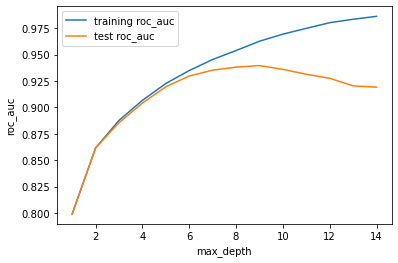

In [88]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"].data, 
         score["mean_train_score"], 
         label="training roc_auc")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_depth")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [89]:
tree.best_params_

{'max_depth': 9}

#### 2. min_samples_leaf

In [90]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(10, 40, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                    scoring="roc_auc",
                    n_jobs=-1,
                    return_train_score=True)
tree.fit(X_lasso_tr, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(10, 40, 5)},
             return_train_score=True, scoring='roc_auc')

In [91]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.503521,0.067200,0.009373,7.653371e-03,10,{'min_samples_leaf': 10},0.927390,0.956683,0.959362,0.957791,0.957736,0.951792,0.012231,6,0.993623,0.992195,0.991308,0.991950,0.991502,0.992116,0.000817
1,1.337075,0.081140,0.006249,7.653021e-03,15,{'min_samples_leaf': 15},0.931159,0.956470,0.960424,0.960023,0.963301,0.954275,0.011760,5,0.990087,0.987721,0.987021,0.988195,0.987301,0.988065,0.001086
2,1.382742,0.072282,0.006250,7.654714e-03,20,{'min_samples_leaf': 20},0.934503,0.958379,0.960793,0.963985,0.961664,0.955865,0.010830,3,0.986767,0.984574,0.983451,0.984355,0.984477,0.984725,0.001097
3,1.282838,0.072965,0.009374,7.653799e-03,25,{'min_samples_leaf': 25},0.934606,0.958574,0.958535,0.963942,0.964660,0.956064,0.011035,2,0.984154,0.981566,0.980573,0.981650,0.981036,0.981796,0.001242
4,1.202656,0.054135,0.005984,5.761645e-07,30,{'min_samples_leaf': 30},0.934525,0.958895,0.958291,0.963804,0.962610,0.955625,0.010758,4,0.981845,0.979323,0.977320,0.979014,0.978806,0.979261,0.001464


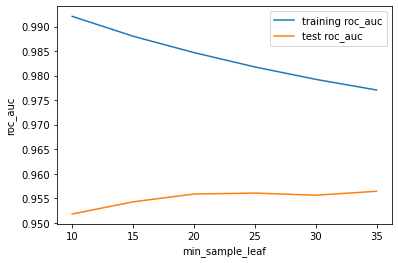

In [92]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training roc_auc")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_sample_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [93]:
tree.best_params_

{'min_samples_leaf': 35}

#### 3. min_samples_split

In [94]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(70, 120, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                    scoring="roc_auc",
                    n_jobs=-1,
                    return_train_score=True)
tree.fit(X_lasso_tr, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(70, 120, 5)},
             return_train_score=True, scoring='roc_auc')

In [95]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.739834,0.119327,0.006249,0.007654,70,{'min_samples_split': 70},0.930921,0.955756,0.960072,0.960472,0.962577,0.953960,0.011730,10,0.989306,0.988318,0.988105,0.987376,0.987765,0.988174,0.000650
1,1.565192,0.113128,0.006249,0.007653,75,{'min_samples_split': 75},0.931650,0.955326,0.958357,0.960546,0.963957,0.953967,0.011509,9,0.988544,0.987723,0.987504,0.986547,0.986641,0.987392,0.000739
2,1.651579,0.091976,0.008986,0.003898,80,{'min_samples_split': 80},0.931138,0.956276,0.959173,0.960736,0.963310,0.954127,0.011718,8,0.987947,0.987189,0.986338,0.985979,0.985941,0.986679,0.000777
3,1.562020,0.135390,0.006184,0.000399,85,{'min_samples_split': 85},0.931026,0.956369,0.960295,0.961237,0.964383,0.954662,0.012091,4,0.987584,0.986497,0.985611,0.985510,0.984972,0.986035,0.000916
4,1.533856,0.107285,0.003591,0.002932,90,{'min_samples_split': 90},0.931868,0.956866,0.960671,0.961192,0.964295,0.954979,0.011794,1,0.986924,0.985731,0.984903,0.984577,0.983919,0.985211,0.001036


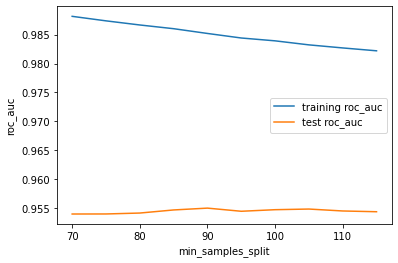

In [96]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [97]:
tree.best_params_

{'min_samples_split': 90}

#### 4. Tuning on max_depth, min_samples_leaf and min_samples_split together

In [98]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 12, 2),
    'min_samples_leaf': range(15, 25, 1),
    'min_samples_split': range(60, 120, 10),
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(criterion = "gini", random_state=100)
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid,
                           scoring='roc_auc',
                           cv = n_folds,
                           n_jobs=-1,
                           return_train_score=True,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso_tr, y_tr)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  4.9min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(15, 25),
                         'min_samples_split': range(60, 120, 10)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [99]:
# cv results
cv_results = grid_search.cv_results_
pd.DataFrame(cv_results).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.190290,0.016848,0.004987,1.927508e-06,1,15,60,"{'max_depth': 1, 'min_samples_leaf': 15, 'min_...",0.775153,0.805917,0.803392,0.803536,0.806987,0.798997,0.012002,301,0.804958,0.797267,0.797897,0.797861,0.796999,0.798996,0.003001
1,0.181911,0.025814,0.008577,6.692901e-03,1,15,70,"{'max_depth': 1, 'min_samples_leaf': 15, 'min_...",0.775153,0.805917,0.803392,0.803536,0.806987,0.798997,0.012002,301,0.804958,0.797267,0.797897,0.797861,0.796999,0.798996,0.003001
2,0.141421,0.004568,0.005784,3.981162e-04,1,15,80,"{'max_depth': 1, 'min_samples_leaf': 15, 'min_...",0.775153,0.805917,0.803392,0.803536,0.806987,0.798997,0.012002,301,0.804958,0.797267,0.797897,0.797861,0.796999,0.798996,0.003001
3,0.139626,0.002274,0.004987,8.064048e-07,1,15,90,"{'max_depth': 1, 'min_samples_leaf': 15, 'min_...",0.775153,0.805917,0.803392,0.803536,0.806987,0.798997,0.012002,301,0.804958,0.797267,0.797897,0.797861,0.796999,0.798996,0.003001
4,0.143416,0.003479,0.004787,7.458050e-04,1,15,100,"{'max_depth': 1, 'min_samples_leaf': 15, 'min_...",0.775153,0.805917,0.803392,0.803536,0.806987,0.798997,0.012002,301,0.804958,0.797267,0.797897,0.797861,0.796999,0.798996,0.003001


In [100]:
print(grid_search.best_params_)

{'max_depth': 11, 'min_samples_leaf': 20, 'min_samples_split': 90}


In [101]:
model_dt = grid_search.best_estimator_

In [102]:
print(model_dt)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=20, min_samples_split=90,
                       random_state=100)


#### Decision tree with optimal hyperparameters

In [104]:
# accuracy score
y_test_pred_dt = model_dt.predict(X_lasso_test)
analysis(y_test, y_test_pred_dt)

Confusion matrix:
 [[7160  915]
 [ 152  325]]
----------------------------
Accuracy: 0.875
----------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      8075
           1       0.26      0.68      0.38       477

    accuracy                           0.88      8552
   macro avg       0.62      0.78      0.65      8552
weighted avg       0.94      0.88      0.90      8552



#### The hyper parameter tuned Decision Tree model give a good recall score, less False Negatives, but less precision and F1-score on the minority class i.e. 1 which corresponds to churn. As can be seen, the precision, recall and F1-score have improved after hyperparameter tuning.

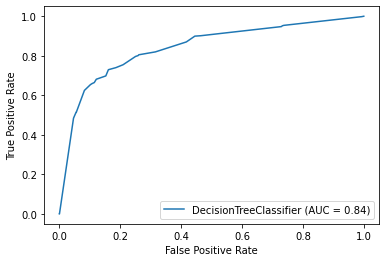

In [105]:
plot_roc_curve(dt1, X_lasso_test, y_test)
plt.show()

## 5. Random Forest

### Fit RandomForestClassifier

In [106]:
model_rf = RandomForestClassifier(random_state=100)
model_rf.fit(X_lasso_tr, y_tr)

RandomForestClassifier(random_state=100)

### Prediction and analysis

In [107]:
y_test_pred_rf = model_rf.predict(X_lasso_test)
analysis(y_test, y_test_pred_rf)

Confusion matrix:
 [[7755  320]
 [ 202  275]]
----------------------------
Accuracy: 0.939
----------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      8075
           1       0.46      0.58      0.51       477

    accuracy                           0.94      8552
   macro avg       0.72      0.77      0.74      8552
weighted avg       0.95      0.94      0.94      8552



#### The Random Forest classifier gives a comparatively (compared to decision trees and the linear models linear SVM, Logistic Regression) higher precision, recall and a decent F1 score on the minority class i.e. 1-churn as can be seen from the report above. The overall accuracy with RandomForestCXlassifier is also high.

#### Plot roc curve

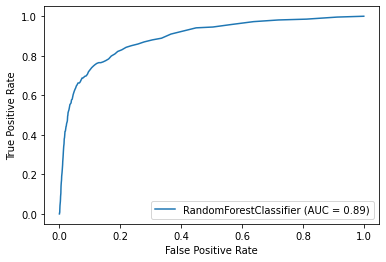

In [108]:
plot_roc_curve(model_rf, X_lasso_test, y_test)
plt.show()

### Hyperparameter tuning

#### 5. Tuning max_depth, min_samples_leaf, min_samples_split, n_estimators and max_features

In [109]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,12,16,20],
    'n_estimators': [115, 120, 125, 130, 135], 
    'min_samples_leaf': [210, 215, 220, 225],
    'min_samples_split':[600, 650, 710, 750],
    'max_features': [10, 20, 25]
}
# Create a based model
rf = RandomForestClassifier(random_state=100)
# Instantiate the Randomized search model
randomized_search = RandomizedSearchCV(estimator = rf, 
                                       param_distributions = param_grid, 
                                       cv = 3, 
                                       verbose = 1,
                                       scoring='roc_auc', 
                                       n_iter=3,
                                       random_state=100)

# fit the grid search with the data
randomized_search.fit(X_lasso_tr, y_tr)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
                   n_iter=3,
                   param_distributions={'max_depth': [4, 8, 12, 16, 20],
                                        'max_features': [10, 20, 25],
                                        'min_samples_leaf': [210, 215, 220,
                                                             225],
                                        'min_samples_split': [600, 650, 710,
                                                              750],
                                        'n_estimators': [115, 120, 125, 130,
                                                         135]},
                   random_state=100, scoring='roc_auc', verbose=1)

In [110]:
# optimal accuracy score and hyperparameters
print('AUC_ROC is',randomized_search.best_score_,'using',randomized_search.best_params_)

AUC_ROC is 0.9395107490832132 using {'n_estimators': 125, 'min_samples_split': 710, 'min_samples_leaf': 225, 'max_features': 10, 'max_depth': 16}


In [111]:
model_rf = randomized_search.best_estimator_

In [112]:
# Make predictions
y_test_pred_rf = model_rf.predict(X_lasso_test)

In [113]:
# evaluation metrics
analysis(y_test, y_test_pred_rf)

Confusion matrix:
 [[7154  921]
 [ 152  325]]
----------------------------
Accuracy: 0.875
----------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      8075
           1       0.26      0.68      0.38       477

    accuracy                           0.87      8552
   macro avg       0.62      0.78      0.65      8552
weighted avg       0.94      0.87      0.90      8552



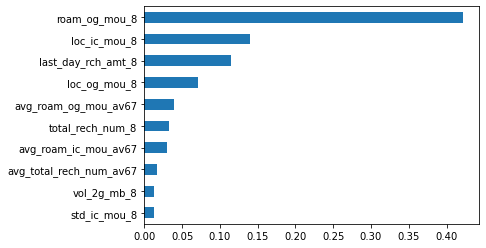

In [114]:
# list of important features
features = X_test.columns[svc_model.get_support()]

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=features)
weights.sort_values()[-10:].plot(kind = 'barh')
plt.show()

### Thus, we have found that the 10 most features/independent variables for churn prediction are:

In [115]:
print(weights.sort_values(ascending=False)[:11])


roam_og_mou_8              0.421975
loc_ic_mou_8               0.139781
last_day_rch_amt_8         0.115280
loc_og_mou_8               0.071087
avg_roam_og_mou_av67       0.039606
total_rech_num_8           0.031999
avg_roam_ic_mou_av67       0.029572
avg_total_rech_num_av67    0.017022
vol_2g_mb_8                0.013385
std_ic_mou_8               0.012636
offnet_mou_8               0.011533
dtype: float64


# XGBoost Classifier

In [116]:
from xgboost import XGBClassifier

#using scale_pos_weight = 11 basis the class imbalnce which is approximately in 90:10 ratio. sum of negative class: sum of positive class
# churn  with value 1 is the positive class. This is done to handle the imbalanced dataset and give more weight to the positive class i.e. churn in this case
# the cost of not predicting a customer who has a higher propensity to churn is high vs predicting a non- churn customer as churn
xgc = XGBClassifier(scale_pos_weight=9, verbosity=0)
xgc.fit(X_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=9, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

#### Note: Using "scale_pos_weight" attribute for handling class imbalance for the model to learn better on the minority class as well and make better predictions

In [117]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = xgc.predict_proba(X_test)
y_pred[:10]

array([[9.9967456e-01, 3.2546438e-04],
       [8.4253043e-01, 1.5746956e-01],
       [9.9966621e-01, 3.3380982e-04],
       [9.9892861e-01, 1.0714184e-03],
       [9.9973369e-01, 2.6632802e-04],
       [4.4045061e-01, 5.5954939e-01],
       [9.9884278e-01, 1.1571997e-03],
       [9.9964416e-01, 3.5581208e-04],
       [9.7930551e-01, 2.0694504e-02],
       [9.9948162e-01, 5.1838649e-04]], dtype=float32)

In [118]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 87.55%


In [119]:
y_test_pred = xgc.predict(X_test)

In [120]:
# evaluation metrics
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8075
           1       0.38      0.60      0.46       477

    accuracy                           0.92      8552
   macro avg       0.68      0.77      0.71      8552
weighted avg       0.94      0.92      0.93      8552

[[7602  473]
 [ 192  285]]


XGBoostclassifier model without hyperparameter tuning gives a reasonable recall score but less presicion, which we will further try to balance and get better overall scores with hyperparameter tuning for best fit model. 

Let's now try tuning the hyperparameters using k-fold CV. We'll then use RandomizedSearch CV to find the optimal values of hyperparameters.

In [121]:
# Hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
# Need to set the subsample parameter and try optimizing the model
param_grid = {'learning_rate': [0.45,0.5,0.55], 
             'subsample': [0.7, 0.8, 0.9],
              'gamma':[0.9,1,1.1,1.2],
             'n_estimators': [90,100,110],
             'min_child_weight':[25,30,35],
             'num_parallel_tree':[1,2],
             'max_depth': [3,4,5]}          


# specify model
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=1, gpu_id=-1, importance_type = 'gain', 
                    interaction_constraint ='', n_jobs=48, nthread=None, random_state=100,
                          tree_method='exact', validate_parameters=1,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=9,  verbose=0)
#trying with "precision" as the scoring criteria in randomized search cross validation

model_cv = RandomizedSearchCV(estimator = xgb_model, 
                                       param_distributions = param_grid, 
                                       cv = 3, 
                                       verbose = 1,
                                       scoring='recall',
                                       n_jobs = -1,
                                       n_iter=25,
                                       random_state=100)

# fit the grid search with the data
model_cv.fit(X_tr, y_tr)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 15.3min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=None,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraint='',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None...
                                           subsample=None, tree_method='exact',
                                           validate_parameters=1, verbose=0,
                        

In [122]:
print(model_cv.best_params_)

{'subsample': 0.9, 'num_parallel_tree': 2, 'n_estimators': 90, 'min_child_weight': 30, 'max_depth': 3, 'learning_rate': 0.45, 'gamma': 1}


In [123]:
# optimal accuracy score and hyperparameters
print('AUC_ROC is',model_cv.best_score_,'using',model_cv.best_params_)

AUC_ROC is 0.9780715642289598 using {'subsample': 0.9, 'num_parallel_tree': 2, 'n_estimators': 90, 'min_child_weight': 30, 'max_depth': 3, 'learning_rate': 0.45, 'gamma': 1}


#### This is a good AUC_ROC score is in the range 0.95 - 1.00 which is observed in XGBoost and the best among all the models tried.

In [124]:
best_estimator = model_cv.best_estimator_

In [125]:
print(best_estimator)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraint='',
              interaction_constraints='', learning_rate=0.45, max_delta_step=0,
              max_depth=3, min_child_weight=30, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=48, nthread=48,
              num_parallel_tree=2, random_state=100, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=9, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbose=0, verbosity=None)


In [126]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_num_parallel_tree,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,28.330986,0.609492,0.098108,0.001277,0.9,1,110,35,5,0.45,1.1,"{'subsample': 0.9, 'num_parallel_tree': 1, 'n_...",0.913826,1.000000,0.999841,0.971222,0.040585,20
1,32.741167,4.812072,0.124541,0.026902,0.9,2,90,30,3,0.45,1,"{'subsample': 0.9, 'num_parallel_tree': 2, 'n_...",0.934374,0.999841,1.000000,0.978072,0.030899,1
2,49.134028,6.831302,0.215798,0.030872,0.9,2,100,35,3,0.55,0.9,"{'subsample': 0.9, 'num_parallel_tree': 2, 'n_...",0.922905,0.999841,1.000000,0.974249,0.036305,8
3,35.014587,0.165363,0.148500,0.005936,0.8,1,110,30,3,0.5,1,"{'subsample': 0.8, 'num_parallel_tree': 1, 'n_...",0.920675,0.999522,0.999841,0.973346,0.037244,10
4,51.809926,0.279992,0.162559,0.008763,0.9,2,90,35,3,0.55,1.1,"{'subsample': 0.9, 'num_parallel_tree': 2, 'n_...",0.924976,1.000000,1.000000,0.974992,0.035367,6
5,46.616806,1.387756,0.153264,0.017167,0.9,1,90,25,5,0.45,0.9,"{'subsample': 0.9, 'num_parallel_tree': 1, 'n_...",0.914782,0.999044,0.999681,0.971169,0.039873,21
6,51.595002,0.347704,0.152419,0.018327,0.7,2,100,30,3,0.45,0.9,"{'subsample': 0.7, 'num_parallel_tree': 2, 'n_...",0.930392,0.999522,0.999841,0.976585,0.032664,4
7,40.710318,0.336009,0.160862,0.011906,0.7,1,110,30,4,0.5,1.2,"{'subsample': 0.7, 'num_parallel_tree': 1, 'n_...",0.914463,0.999841,0.999681,0.971328,0.040210,19
8,79.783400,1.597564,0.162851,0.023790,0.8,2,110,35,4,0.55,1.1,"{'subsample': 0.8, 'num_parallel_tree': 2, 'n_...",0.914304,1.000000,1.000000,0.971435,0.040398,17
9,73.190328,2.197031,0.154601,0.008979,0.7,2,100,30,4,0.55,1,"{'subsample': 0.7, 'num_parallel_tree': 2, 'n_...",0.917649,1.000000,1.000000,0.972550,0.038821,13


### Building the model with the tuned hyperparameters and the best estimator arrived at in the previous step

In [127]:
# predict
y_pred = best_estimator.predict_proba(X_test)
y_pred[:10]

array([[9.9917823e-01, 8.2178082e-04],
       [2.4592304e-01, 7.5407696e-01],
       [9.9206108e-01, 7.9389066e-03],
       [9.9577385e-01, 4.2261439e-03],
       [9.9863952e-01, 1.3604854e-03],
       [1.3619137e-01, 8.6380863e-01],
       [9.7760475e-01, 2.2395281e-02],
       [9.7027981e-01, 2.9720204e-02],
       [8.1842375e-01, 1.8157622e-01],
       [9.9835861e-01, 1.6414054e-03]], dtype=float32)

In [128]:
y_test_pred = best_estimator.predict(X_test)

In [129]:
# evaluation metrics
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      8075
           1       0.26      0.78      0.39       477

    accuracy                           0.87      8552
   macro avg       0.62      0.83      0.66      8552
weighted avg       0.95      0.87      0.89      8552

[[7028 1047]
 [ 104  373]]


#### As can be seen from the report above that get a higher precision with the XGBoost classifer and a decent recall and F1-score which can be further improved with hyperparameter tuning. So, if reduction of FALSE positive for predicting churn is what would matter to business, then XGBoost can be a preferred model

In [130]:
# roc_auc
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.8892951950724016

As can be seen the AUC score has improved after hyper-parameter tuning

In [131]:
# feature importance
importance = dict(zip(X_tr.columns, best_estimator.feature_importances_))
importance

{'arpu_8': 0.06059407,
 'onnet_mou_8': 0.0042793215,
 'offnet_mou_8': 0.008750649,
 'roam_ic_mou_8': 0.091159776,
 'roam_og_mou_8': 0.0963297,
 'loc_og_t2c_mou_8': 0.0077504986,
 'loc_og_mou_8': 0.0061106533,
 'std_og_t2f_mou_8': 0.0097707445,
 'std_og_mou_8': 0.005567781,
 'isd_og_mou_8': 0.0094060665,
 'spl_og_mou_8': 0.013942109,
 'og_others_8': 0.0,
 'loc_ic_mou_8': 0.024401845,
 'std_ic_t2t_mou_8': 0.0040465263,
 'std_ic_t2f_mou_8': 0.005088606,
 'std_ic_mou_8': 0.01358019,
 'spl_ic_mou_8': 0.037650786,
 'isd_ic_mou_8': 0.0057350085,
 'ic_others_8': 0.003542127,
 'total_rech_num_8': 0.028127754,
 'max_rech_amt_8': 0.008501061,
 'last_day_rch_amt_8': 0.02858785,
 'vol_2g_mb_8': 0.007429853,
 'monthly_2g_8': 0.033553775,
 'sachet_2g_8': 0.023845151,
 'monthly_3g_8': 0.023785612,
 'sachet_3g_8': 0.00561402,
 'aug_vbc_3g': 0.007062911,
 'jul_vbc_3g': 0.005639282,
 'jun_vbc_3g': 0.005533558,
 'sep_vbc_3g': 0.02849811,
 'avg_arpu_av67': 0.012373498,
 'avg_onnet_mou_av67': 0.004039648,
 

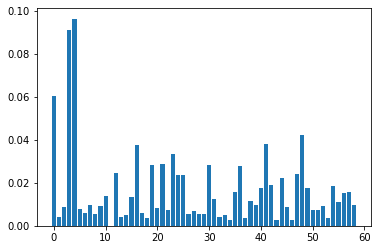

In [132]:
# plot
plt.bar(range(len(best_estimator.feature_importances_)), best_estimator.feature_importances_)
plt.show()

## Overall Conclusion

Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn. 
Here we define and label non-churn as "0" and churn as "1" in the dataset.
For the puropose of this case study we need to focus on customer retention as the cost of acquiring a new customer can be 5-10 times more than the cost of retaining an existing customer. In this case study, we want to be using the model evaluation parameters like Precision, Recall, F1-score of the minority class (Churn - 1) in addition to seeing that how the model overall is performing in terms of high ROC_AUC score and accuracy. 
The idea is to try different linear models and Tree based models by tuning the hyperparameters and see which one is giving us a high precision, recall, F1- score ROC_AUC

So, while the intent is to try to see how we can maintain a high TRUE positive rate and minimize the FALSE positive rate and FALSE Negative rate. Need to see which model is performing better on the AUC_ROC, Recall and F1 scores.
The business sense is that to some extent it is ok to role out an offer to a potential non-churn customer, but certainly cannot mis predict potential churn customers as non-churn customers, in which case if corrective action is not taken in time the company may potentially lose those customers and then the cost of acquiring new customers can be huge.

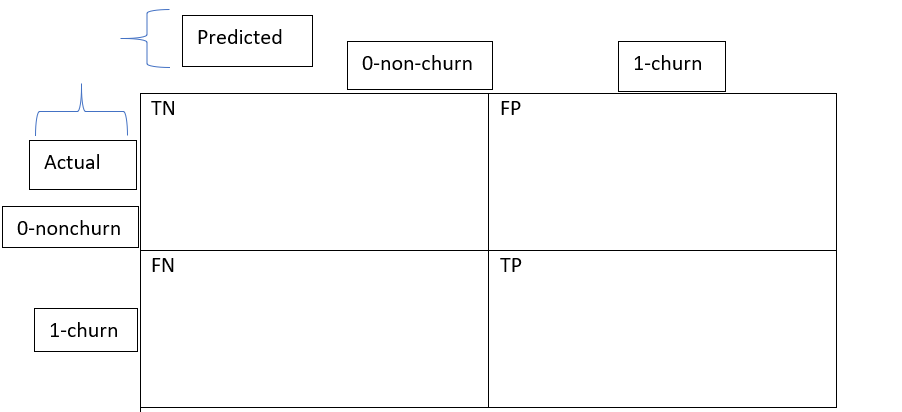

### Model Evaluation Metric considerations:

Model Evaluation is done on ROC_AUC, Recall and F1-score and need to evaluate the trade off between False Negative and False Positive while maintaining a high True Positive and True negative rate. For Business this means that eventually they may be rolling out offers to customers who have alesser propensity to churn, but will be able to retain more customer if the False Negatives are minimized. While False positive also matters and precision is important, so that the company is not rolling out offers to too many customers not at risk of churn (since that would be cost to business as well), so there is a trade-off there and the idea is to select a model with good Recall scores, so that the False Negatives are minimized and at the same time the model exhibits a good F1-score (to balance the precision) and has a healthy ROC_AUC score (>80%).

### Recommendations to Business:

1. STD Outgoing Calls and Revenue Per Customer are strong indicators of Churn.  

2. Local Incoming and Outgoing Calls for 8th Month and ARPU in 8th Month are the most important columns to predict churn.  

3. Customers with tenure less than 4 yrs (AON) are more likely to churn while the tenured customers are less likely to churn. So, there should be a more focused strategy to tackle the less tenures customer as chances of them attriting first are high. So, look what are the indications where Quality of service levels is leading to poor CSAT or is it because a competitor has given a better offer. Look for these signals and then device a campaign to target those customers in the < 4 years (AON) bracket first.  

4.  Roaming incoming and outgoing MOU in 8th month needs to be watched out for as the customer may show a considerable dip in the outgoing charges from T2T or T2O (same network or other operator) if the customer has decided to move onto other service provider. While the customer may want to keep just incoming charges for sometime before switching over to another operator.

5. It may so be the case that the customer has travelled abroad and temporarily suspended the usage of the pre-paid SIM and may want to immediately resume after coming back. In this case we need to see whether there is no activity at all, no data, calls, SMS charges and no recharges done, so we can keep these cases on the radar and try to distinguish from the actual churn cases.

6. Max recharge amount in 8th month is also a predictor of churn. If the customer has done a big recharge with higgher validity, then the likelihood of the customer churning in the next month is less.

7. Can roll out better data offers to double the data or better data pack offers with bundled services for longer validity if there is dip in 2G and 3G Data charges or call charges in the 8th month.

8. Number and amount of recharges (sachet, monthly) in 8th month needs to be seen as it is an indicator if the customer would have been availing it in the 6th and 7th month but in 8th month the activity may be slowing down as the customer might be making up mind to switch providers.

9. See if the customer is using the services only for incoming charges and no outgoing charges or revenue from the customer other than the IUC charges. See, if there can be sachet recharge offers rolled out to such customers for voice, data which does not hurt the pocket too much.

### Prediction results with different models

Below are the prediction results with different models


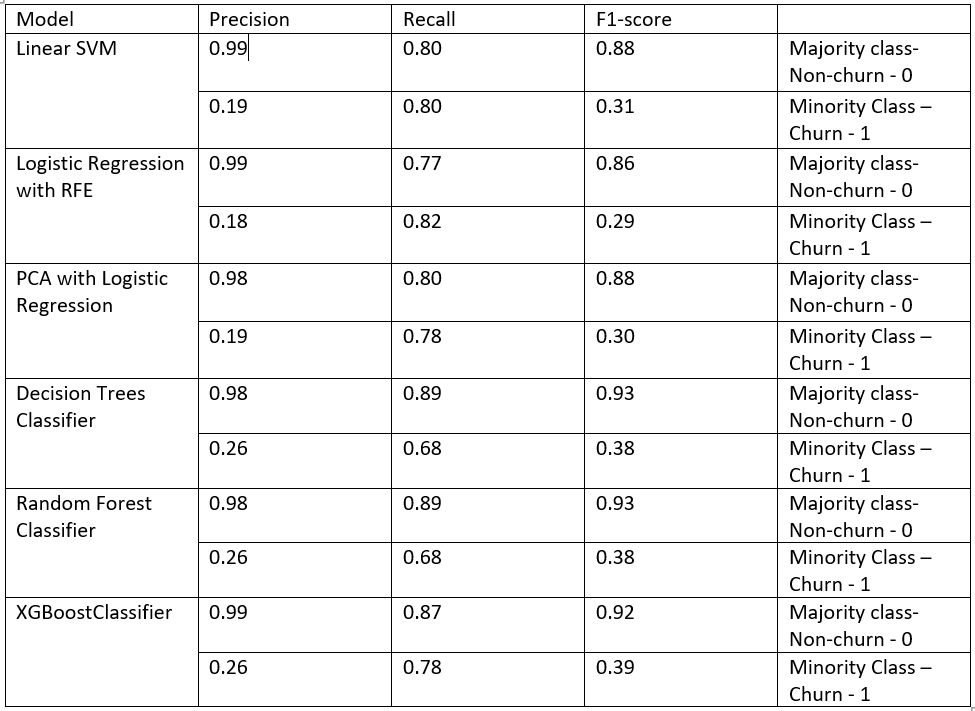

Note: There may be negligible difference when the notebook is run as observing slight deviations in above numbers even after using random_state = 100

Random Forest Classifier and XGBoost Classifier give a good balance of Recall, F1-score, ROC_AUC and can be considered. F1-score AUC_ROC is the best in XGBoost followed by Random Forest.

Used PCA with Logistic regression for prediction of churn and used the tree based model like Random Forest and Boosting Model like XGBoost to identify the potential predictors of churn as PCA may not be able to explain the actual predictor variables in the final model.